# SQLite LIP

Runtimes: 3.2669116020202638 vs 4.950476121902466
Runtimes: 8.311988687515258 vs 9.884668397903443
Runtimes: 9.62202730178833 vs 10.270646619796754
Runtimes: 4.182496118545532 vs 4.010508441925049
Runtimes: 4.030994081497193 vs 3.902417469024658
Runtimes: 4.311980676651001 vs 4.392369127273559
Runtimes: 4.625337982177735 vs 5.143486213684082
Runtimes: 10.847722434997559 vs 10.92710976600647
Runtimes: 22.45107979774475 vs 21.868311882019043
Runtimes: 12.003610563278198 vs 12.090171670913696
Runtimes: 33.734938097000125 vs 34.82259731292724
Runtimes: 16.521430587768556 vs 16.45304160118103
Runtimes: 16.476150131225587 vs 16.42576460838318
Runtimes: 17.095491313934325 vs 17.858838176727296
Runtimes: 8.616092491149903 vs 8.67224736213684
Runtimes: 7.016943883895874 vs 6.8829326152801515
Runtimes: 8.121317434310914 vs 8.28084363937378
Runtimes: 5.324255180358887 vs 5.216559791564942
Runtimes: 5.059339714050293 vs 5.025520277023316
Runtimes: 9.236562156677246 vs 10.854203176498412
Runtimes: 

Text(0, 0.5, 'run time (seconds)')

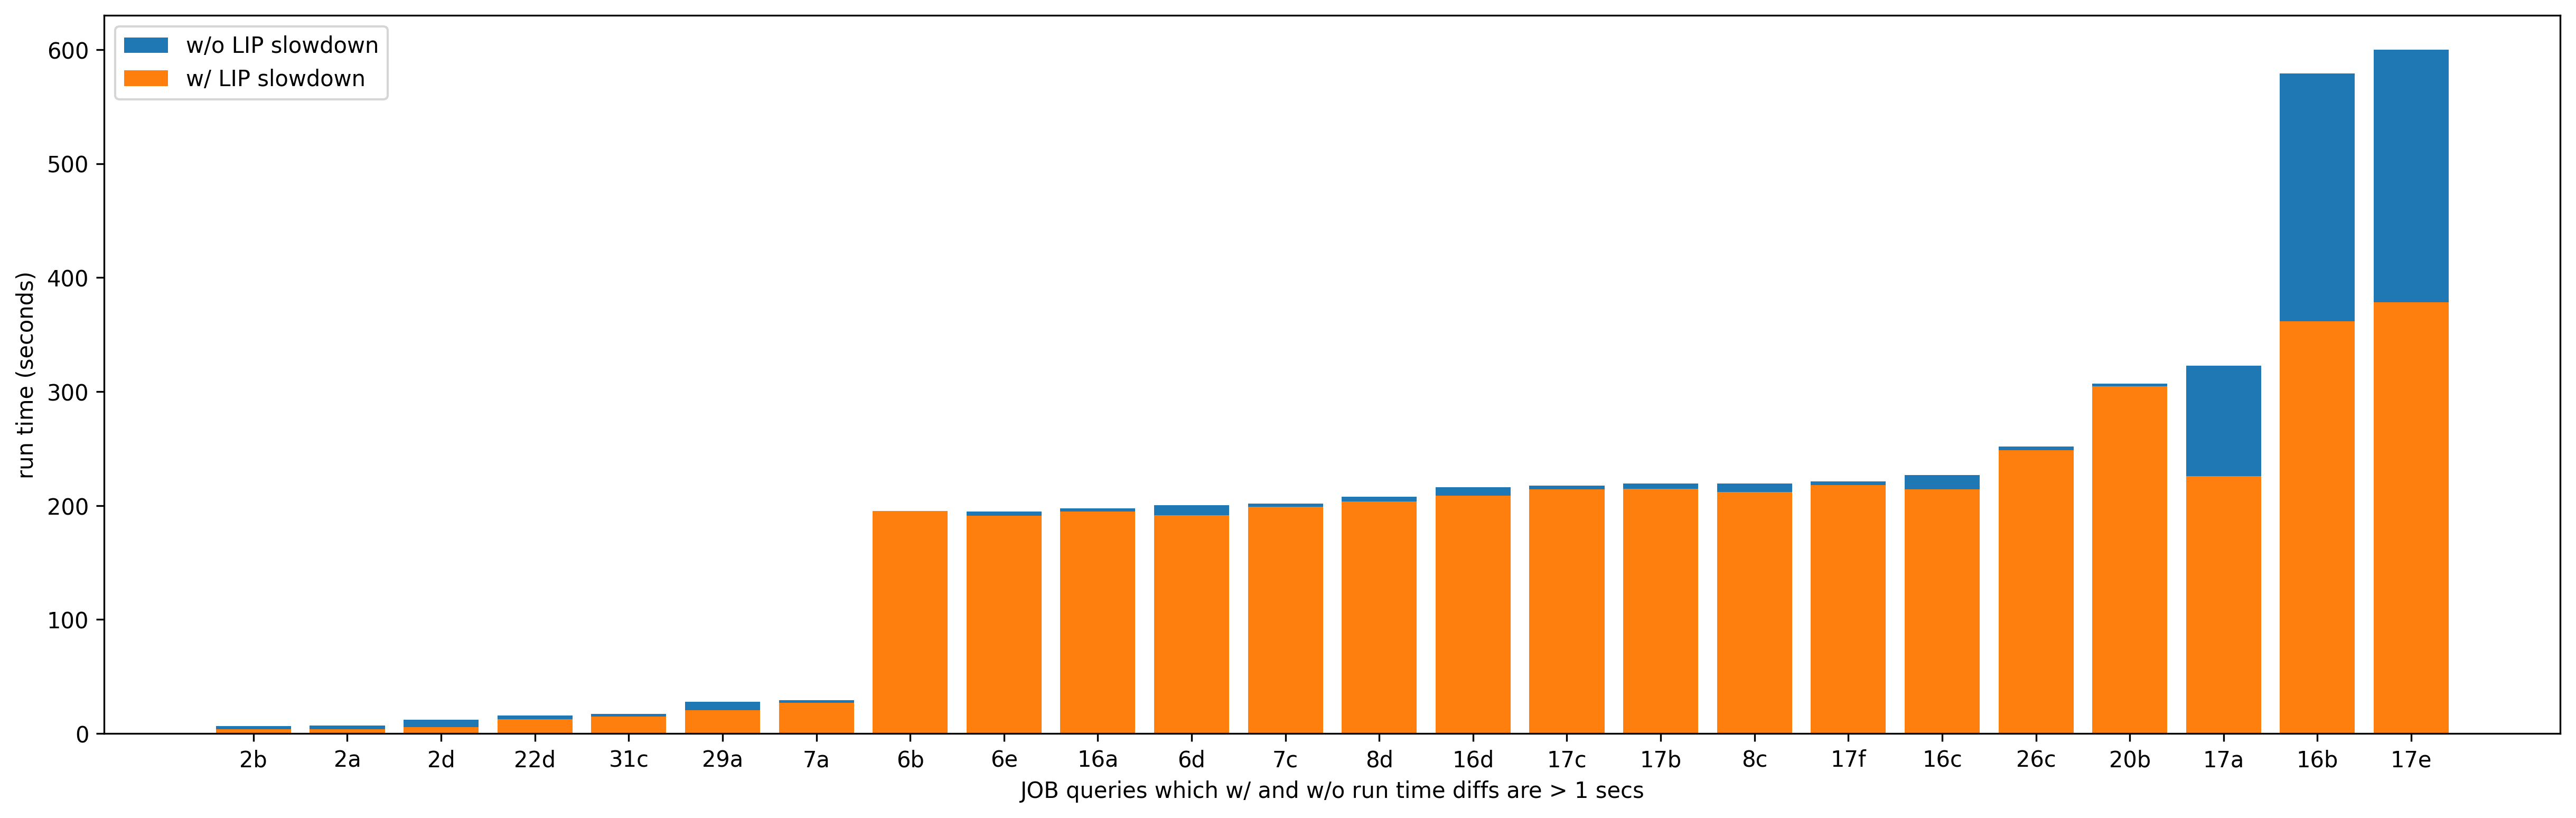

In [26]:
import json
import numpy as np

lip_filename = 'sqlite_imdb_runtimes.json'
no_lip_filename = 'sqlite_imdb_wo_lip_runtimes.json'

# lip_filename = 'sqlite_imdb_fk_runtimes.json'
# no_lip_filename = 'sqlite_imdb_fk_wo_lip_runtimes.json'

# lip_filename = 'sqlite_tpch_sf1_runtimes.json'
# no_lip_filename = 'sqlite_tpch_sf1_wo_lip_runtimes.json'


lip_runtimes = json.load(open(lip_filename))
non_lip_runtimes = json.load(open(no_lip_filename))


fixed_runtimes_lip = {}
fixed_runtimes_non_lip = {}

for q in lip_runtimes:
    lip_runtime = lip_runtimes[q]
    nonlip_runtime = non_lip_runtimes[q]
    
    lip_runtime = np.average(lip_runtime)
    nonlip_runtime = np.average(nonlip_runtime)
    print(f"Runtimes: {lip_runtime} vs {nonlip_runtime}")
    
    if nonlip_runtime < 0:
        nonlip_runtime = 600
        
    if lip_runtime < 0:
        lip_runtime = 600
    
    if np.abs(nonlip_runtime - lip_runtime) >= 2:
        fixed_runtimes_lip[q.split('.')[0]] = lip_runtime
        fixed_runtimes_non_lip[q.split('.')[0]] = nonlip_runtime

fixed_runtimes_non_lip = {k: v for k, v in sorted(fixed_runtimes_non_lip.items(), key=lambda item: item[1])}
fixed_runtimes_lip = {k: fixed_runtimes_lip[k] for k in fixed_runtimes_non_lip.keys()}

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 6), dpi=300)
# ax.bar(fixed_runtimes_non_lip.keys(), fixed_runtimes_non_lip.values(), label='w/o LIP slowdown', alpha=0.5)
# ax.bar(fixed_runtimes_non_lip.keys(), fixed_runtimes_lip.values(), label='w/ LIP slowdown', alpha=0.5)

plt.bar([i for i in fixed_runtimes_non_lip.keys()], fixed_runtimes_non_lip.values(), label='w/o LIP slowdown', alpha=1)
plt.bar([i for i in fixed_runtimes_lip.keys()], fixed_runtimes_lip.values(), label='w/ LIP slowdown', alpha=1)

plt.legend()
plt.xlabel("JOB queries which w/ and w/o run time diffs are > 1 secs")
plt.ylabel("run time (seconds)")

# PG LIP

Q:1.sql: Runtimes: 2.9958436489105225 vs 2.986269235610962
Q:10.sql: Runtimes: 5.8451666831970215 vs 5.900971055030823
Q:11.sql: Runtimes: 3.0271066427230835 vs 2.734624981880188
Q:12.sql: Runtimes: 3.001637816429138 vs 2.48476505279541
Q:13.sql: Runtimes: 48.95382010936737 vs 55.66814064979553
Q:14.sql: Runtimes: 14.311826348304749 vs 15.64615547657013
Q:15.sql: Runtimes: 4.040569305419922 vs 4.285926103591919
Q:2.sql: Runtimes: 4.14104688167572 vs 3.3908421993255615
Q:3.sql: Runtimes: 4.825710296630859 vs 3.6262272596359253
Q:4.sql: Runtimes: 2.2472046613693237 vs 2.3053009510040283
Q:5.sql: Runtimes: 2.2315900325775146 vs 2.3350026607513428
Q:6.sql: Runtimes: 20.639723658561707 vs 21.102667808532715
Q:7.sql: Runtimes: 7.143784880638123 vs 6.157232046127319
Q:8.sql: Runtimes: 4.333751678466797 vs 3.1596176624298096
Q:9.sql: Runtimes: 84.57245659828186 vs 86.75699496269226


Text(0, 0.5, 'run time (seconds)')

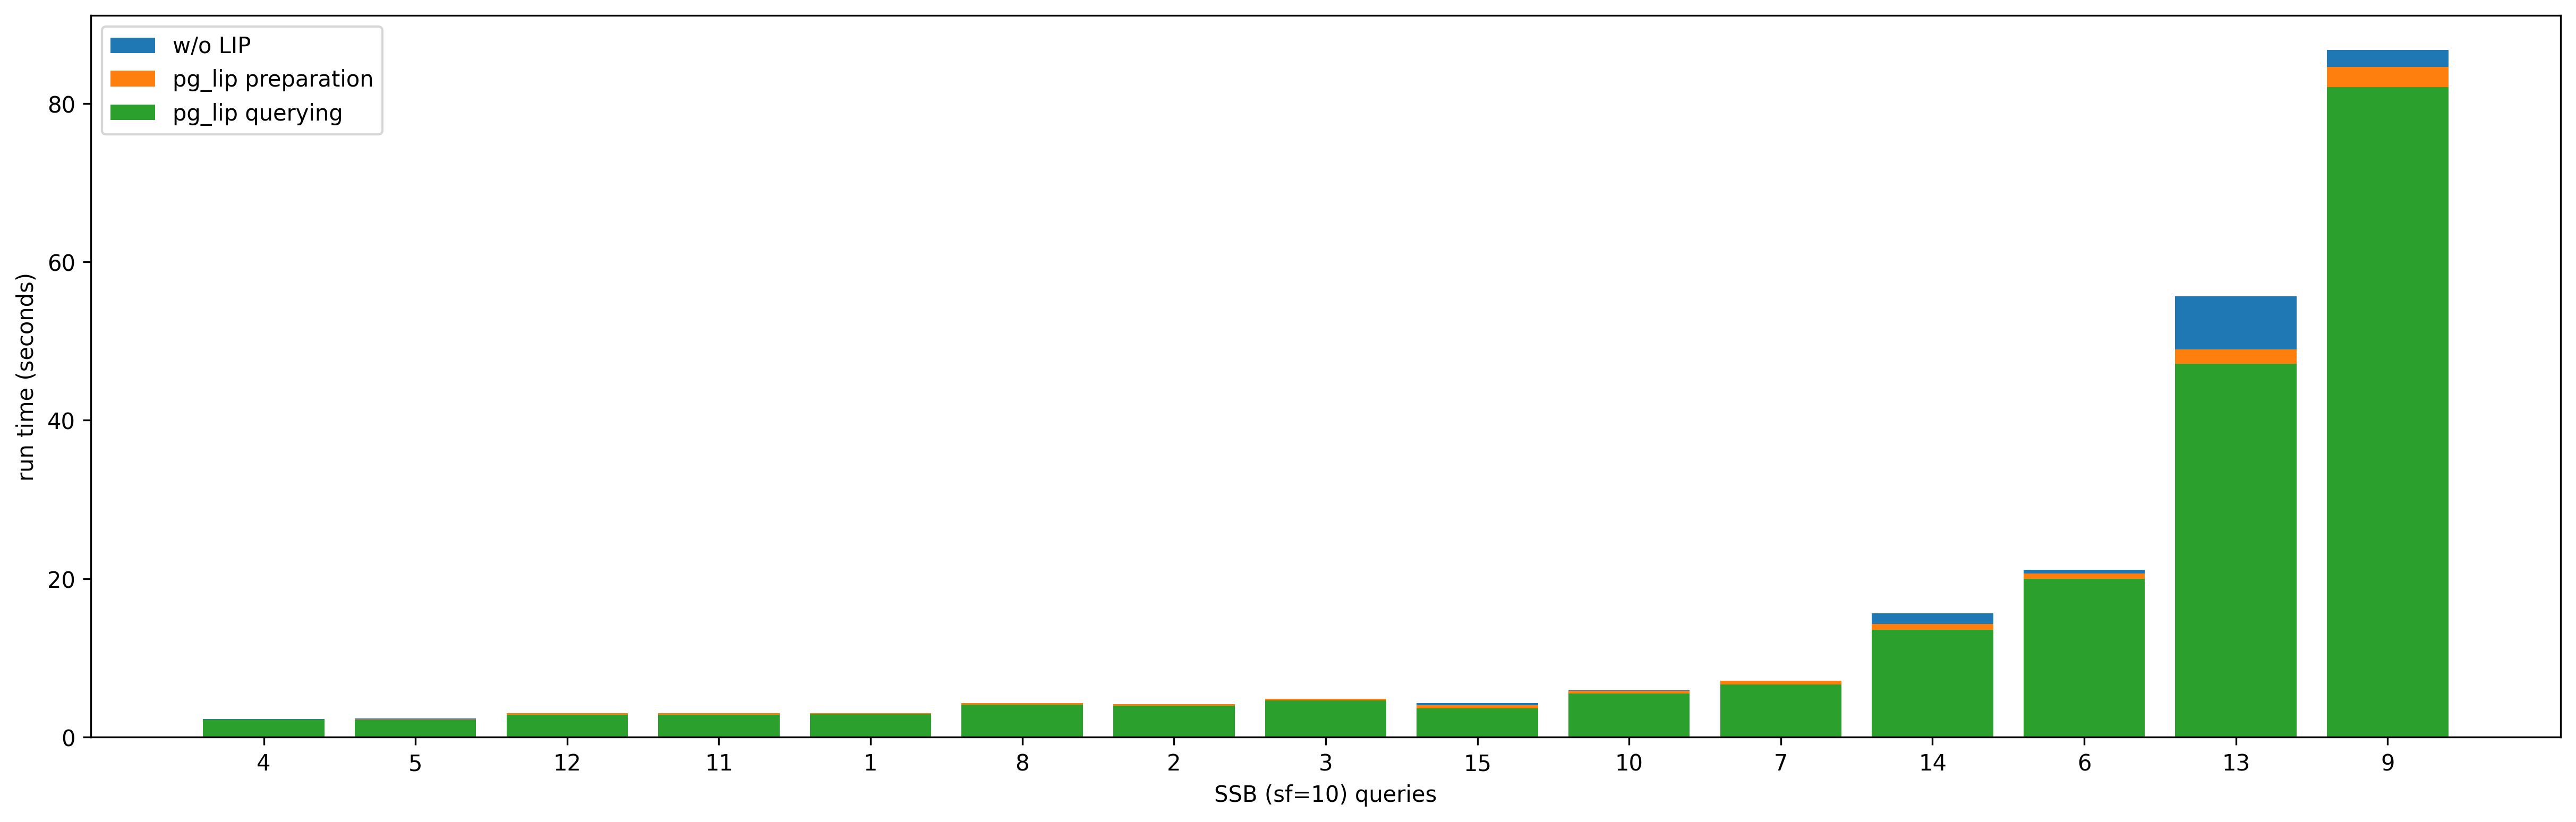

In [2]:
import json
import numpy as np

no_lip_filename = 'postgres_parallel=1_ssb_sf10_runtimes.json'
lip_filename = 'postgres_pg_lip_parallel=1_ssb_sf10_runtimes.json'

# lip_filename = 'sqlite_imdb_fk_runtimes.json'
# no_lip_filename = 'sqlite_imdb_fk_wo_lip_runtimes.json'

# lip_filename = 'sqlite_tpch_sf1_runtimes.json'
# no_lip_filename = 'sqlite_tpch_sf1_wo_lip_runtimes.json'

non_lip_runtimes = json.load(open(no_lip_filename))
lip_runtimes = json.load(open(lip_filename))


fixed_runtimes_lip_total = {}
fixed_runtimes_lip_query = {}
fixed_runtimes_non_lip = {}

for q in lip_runtimes:
    
    lip_runtime = np.array(lip_runtimes[q])
    nonlip_runtime = non_lip_runtimes[q]
    
    lip_runtime_total = np.average(lip_runtime[:, 0])
    lip_runtime_query = np.average(lip_runtime[:, -1])
    
    nonlip_runtime = np.average(nonlip_runtime)
    print(f"Q:{q}: Runtimes: {lip_runtime_total} vs {nonlip_runtime}")
    
#     if nonlip_runtime < 0:
#         nonlip_runtime = 600
        
#     if lip_runtime < 0:
#         lip_runtime = 600
    
    if np.abs(lip_runtime_total - nonlip_runtime) / nonlip_runtime >= 0.00:
        fixed_runtimes_lip_total[q.split('.')[0]] = lip_runtime_total
        fixed_runtimes_lip_query[q.split('.')[0]] = lip_runtime_query
        fixed_runtimes_non_lip[q.split('.')[0]] = nonlip_runtime

fixed_runtimes_non_lip = {k: v for k, v in sorted(fixed_runtimes_non_lip.items(), key=lambda item: item[1])}
fixed_runtimes_lip_total = {k: fixed_runtimes_lip_total[k] for k in fixed_runtimes_non_lip.keys()}
fixed_runtimes_lip_query = {k: fixed_runtimes_lip_query[k] for k in fixed_runtimes_non_lip.keys()}


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 6), dpi=300)
# ax.bar(fixed_runtimes_non_lip.keys(), fixed_runtimes_non_lip.values(), label='w/o LIP slowdown', alpha=0.5)
# ax.bar(fixed_runtimes_non_lip.keys(), fixed_runtimes_lip.values(), label='w/ LIP slowdown', alpha=0.5)

plt.bar([i for i in fixed_runtimes_non_lip.keys()], fixed_runtimes_non_lip.values(), label='w/o LIP', alpha=1)
plt.bar([i for i in fixed_runtimes_lip_total.keys()], fixed_runtimes_lip_total.values(), label='pg_lip preparation', alpha=1)
plt.bar([i for i in fixed_runtimes_lip_query.keys()], fixed_runtimes_lip_query.values(), label='pg_lip querying', alpha=1)


plt.legend()
plt.xlabel("SSB (sf=10) queries")
plt.ylabel("run time (seconds)")

# PG vs LIP vs Balsa

Runtimes: 3.3262134790420532 vs 0.8971456289291382 vs 0.8798540592193603
Runtimes: 3.3322412371635437 vs 3.3343330025672913 vs 1.469599723815918
Runtimes: 3.2800196409225464 vs 3.421449899673462 vs 4.409232664108276
Runtimes: 2.71889191865921 vs 2.7430344820022583 vs 2.4211859703063965
Runtimes: 5.482743859291077 vs 4.977008581161499 vs 1.2689605236053467
Runtimes: 16.128442227840424 vs 15.743858397006989 vs 2.432472658157349
Runtimes: 8.766513526439667 vs 2.6931042671203613 vs 1.3813948154449462
Runtimes: 4.63567316532135 vs 1.3511238098144531 vs 1.1661497592926025
Runtimes: 4.439430117607117 vs 1.1787453889846802 vs 1.626
Runtimes: 4.531508564949036 vs 1.2345821857452393 vs 1.3210267543792724
Runtimes: 8.640966713428497 vs 8.330300748348236 vs 1.583
Runtimes: 7.083523869514465 vs 4.231079041957855 vs 1.6158799171447753
Runtimes: 3.78023624420166 vs 2.486427903175354 vs 2.9012057304382326
Runtimes: 2.509601593017578 vs 2.547316014766693 vs 1.6260451316833495
Runtimes: 6.03580123186111

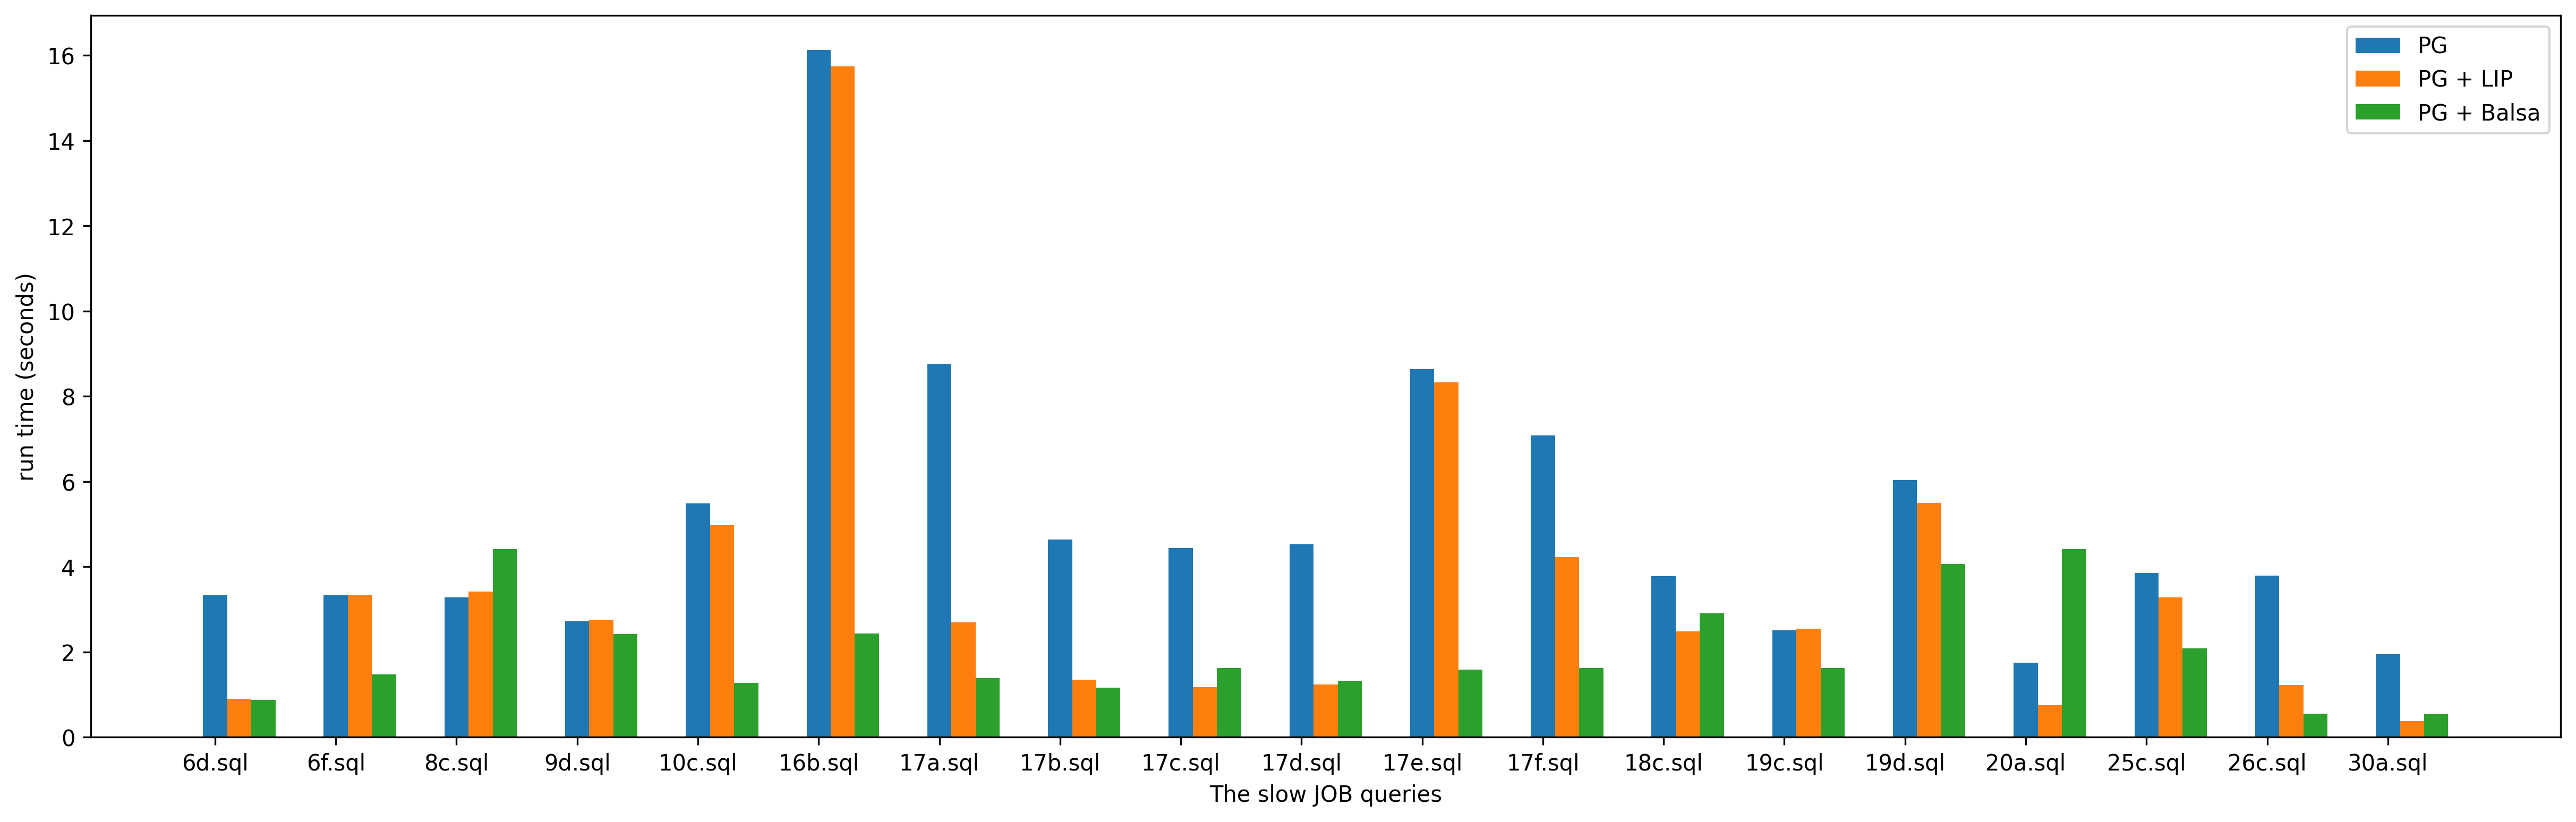

In [3]:
import json
import numpy as np

lip_filename = 'postgres_pg_lip_parallel=1_imdbload_runtimes.json'
no_lip_filename = 'postgres_parallel=1_imdbload_runtimes.json'
balsa_filename = 'postgres_parallel=1_imdbload_balsa_runtimes.json'


job_slow_queries = [
    '6d.sql', '6f.sql', '8c.sql', '9d.sql', 
    '10c.sql', '16b.sql', '17a.sql', '17b.sql',  '17c.sql', '17d.sql',  '17e.sql', '17f.sql',  
    '18c.sql', '19c.sql', '19d.sql', 
    '20a.sql', '25c.sql', '26c.sql', 
    '30a.sql'
]

lip_runtimes = json.load(open(lip_filename))
non_lip_runtimes = json.load(open(no_lip_filename))
balsa_runtimes = json.load(open(balsa_filename))

total_balsa = 0
total_lip_query = 0
total_non_lip = 0

fixed_runtimes_lip_total = {}
fixed_runtimes_lip_query = {}
fixed_runtimes_non_lip = {}
fixed_runtimes_balsa = {}

for q in job_slow_queries:
    
    lip_runtime = np.array(lip_runtimes[q])
    
    nonlip_runtime = non_lip_runtimes[q]
    balsa_runtime = balsa_runtimes[q]
    
    lip_total_runtime = np.average(lip_runtime[1:, 0])
    lip_query_runtime = np.average(lip_runtime[1:, -1])
    
    nonlip_runtime = np.average(nonlip_runtime[1:])
    balsa_runtime = np.average(balsa_runtime)
    
    print(f"Runtimes: {nonlip_runtime} vs {lip_query_runtime} vs {balsa_runtime}")
    
    fixed_runtimes_balsa[q] = balsa_runtime
    fixed_runtimes_lip_total[q] = lip_total_runtime
    fixed_runtimes_lip_query[q] = lip_query_runtime
    fixed_runtimes_non_lip[q] = nonlip_runtime
    
    total_balsa += balsa_runtime
    total_lip_query += lip_query_runtime
    total_non_lip += nonlip_runtime
    
    # if np.abs(nonlip_runtime - lip_runtime) >= 2:
    #     fixed_runtimes_lip[q.split('.')[0]] = lip_runtime
    #     fixed_runtimes_non_lip[q.split('.')[0]] = nonlip_runtime

# fixed_runtimes_non_lip = {k: v for k, v in sorted(fixed_runtimes_non_lip.items(), key=lambda item: item[1])}
# fixed_runtimes_lip = {k: fixed_runtimes_lip[k] for k in fixed_runtimes_non_lip.keys()}

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 6), dpi=300)
# ax.bar(fixed_runtimes_non_lip.keys(), fixed_runtimes_non_lip.values(), label='w/o LIP slowdown', alpha=0.5)
# ax.bar(fixed_runtimes_non_lip.keys(), fixed_runtimes_lip.values(), label='w/ LIP slowdown', alpha=0.5)
width = 0.2

plt.bar([i for i in range(len(job_slow_queries))], fixed_runtimes_non_lip.values(), label='PG', alpha=1, width=width)
# plt.bar([i+width for i in range(len(job_slow_queries))], fixed_runtimes_lip_query.values(), label='PG + LIP', alpha=1, width=width)
plt.bar([i+width for i in range(len(job_slow_queries))], fixed_runtimes_lip_query.values(), label='PG + LIP', alpha=1, width=width)
plt.bar([i+2*width for i in range(len(job_slow_queries))], fixed_runtimes_balsa.values(), label='PG + Balsa', alpha=1, width=width)

plt.xticks([i for i in range(len(job_slow_queries))], job_slow_queries)
plt.legend()
plt.xlabel("The slow JOB queries")
plt.ylabel("run time (seconds)")

print(f"Total improvement: Balsa: {(total_balsa)/total_non_lip:.2f}, PG_LIP: {total_lip_query/total_non_lip:.2f}")

plt.savefig("lip_total_vs_balsa_job_slow.pdf", dpi=300)
# ======================= 


# PG vs PG + LIP vs PG + Balsa JO vs PG + full Balsa vs PG + Balsa + LIP vs Balsa + LIP

Runtimes: 3.291496753692627 vs 0.8548033237457275 vs 0.8314790725708008
Runtimes: 3.2710981369018555 vs 3.4106297492980957 vs 4.375154972076416
Runtimes: 2.5080230236053467 vs 2.6160364151000977 vs 2.385754108428955
Runtimes: 5.447976350784302 vs 4.700750827789307 vs 1.2418544292449951
Runtimes: 8.745522499084473 vs 2.624807596206665 vs 1.3648395538330078
Runtimes: 4.621297836303711 vs 1.311969518661499 vs 1.1554667949676514
Runtimes: 4.414589166641235 vs 1.126312017440796 vs 1.626
Runtimes: 4.518934488296509 vs 1.1863574981689453 vs 1.2509071826934814
Runtimes: 7.066575050354004 vs 4.1105077266693115 vs 1.565995216369629
Runtimes: 3.753419876098633 vs 2.3582096099853516 vs 2.7649447917938232
Runtimes: 2.0982778072357178 vs 2.2552576065063477 vs 1.6110661029815674
Runtimes: 5.966341495513916 vs 5.27062463760376 vs 3.999328851699829
Runtimes: 1.7345881462097168 vs 0.7407221794128418 vs 0.957
Runtimes: 3.833037853240967 vs 3.0407838821411133 vs 2.0167086124420166
Runtimes: 3.782460689544

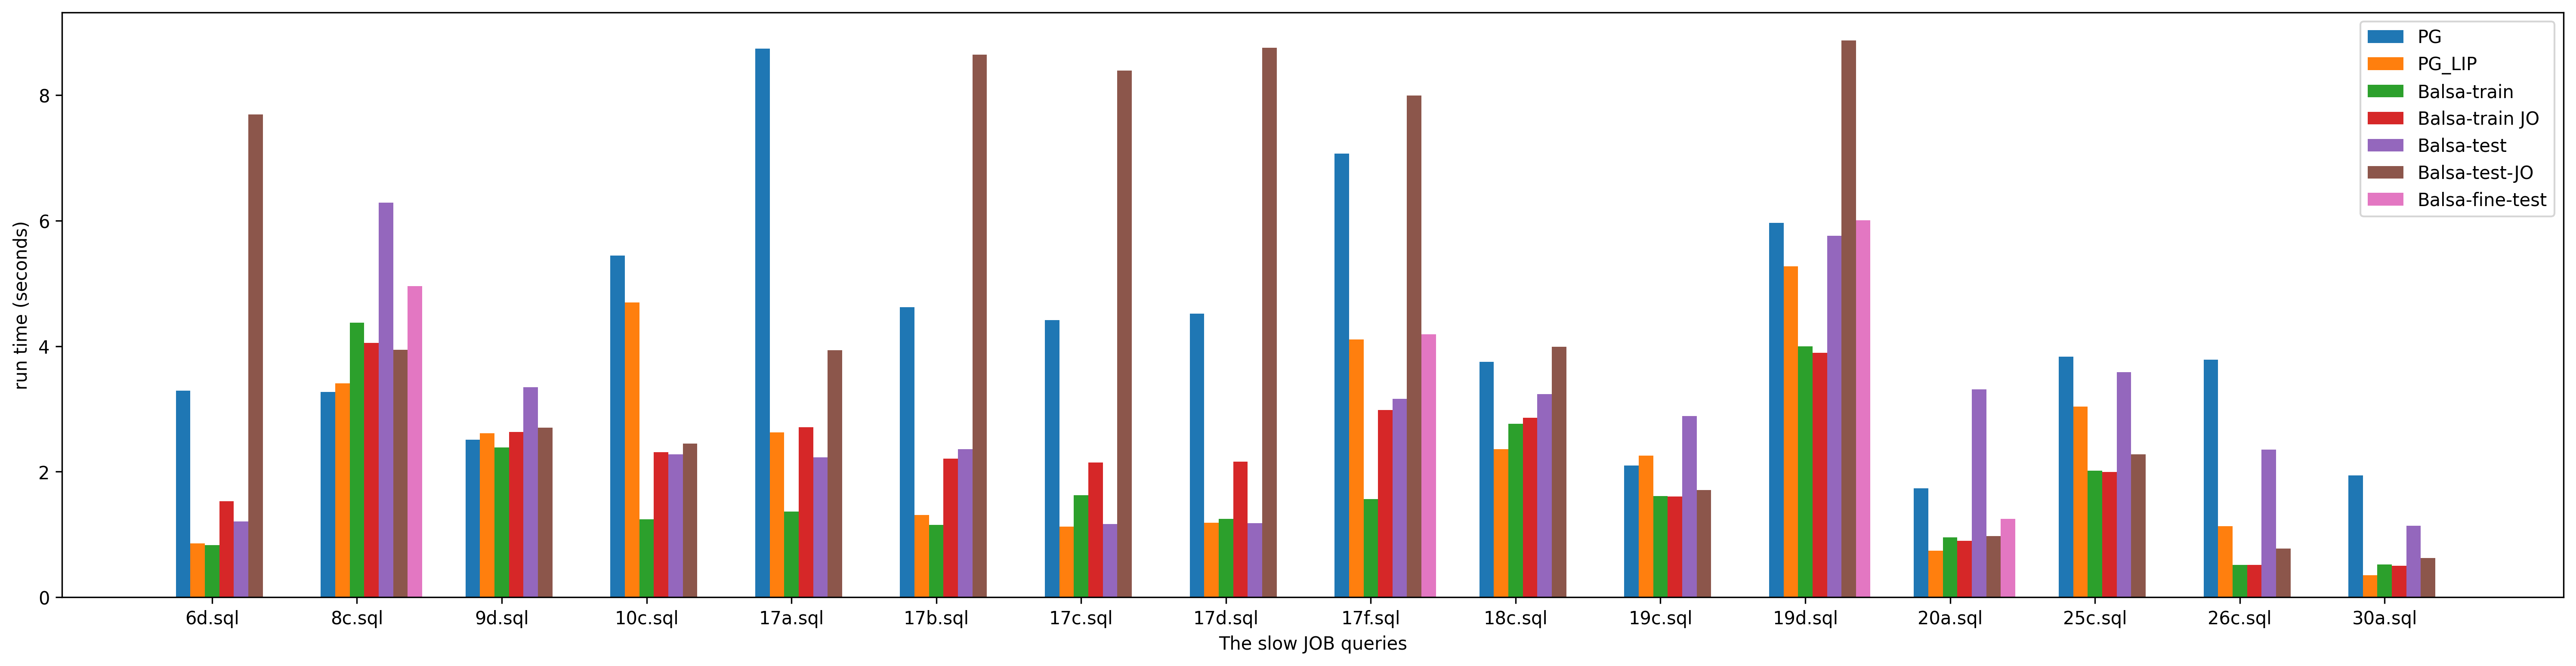

In [12]:
import json
import numpy as np

balsa_lip_filename = 'postgres_pg_lip_balsa_parallel=1_imdbload_runtimes.json'

lip_filename = 'postgres_pg_lip_parallel=1_imdbload_runtimes.json'

no_lip_filename = 'postgres_parallel=1_imdbload_runtimes.json'

balsa_filename = 'postgres_parallel=1_imdbload_balsa_runtimes.json'

balsa_test_filename = "postgres_balsa_job_slow_test_runtimes.json"


pg_balsa_jo_file_name = 'postgres_balsa_jo_parallel=1_imdbload_runtimes.json'
pg_balsa_test_jo_file_name = 'postgres_balsa_test_jo_parallel=1_imdbload_runtimes.json'

pg_balsa_fine_test_file_name = 'postgres_balsa_fine_test_parallel=1_imdbload_runtimes.json'


# lip_filename = 'postgres_pg_lip_parallel=1_imdbload_runtimes.json'


job_slow_queries = [
    '6d.sql', 
    # '6f.sql', 
    '8c.sql', '9d.sql', 
    '10c.sql', 
    # '16b.sql', 
    '17a.sql', '17b.sql',  
    '17c.sql', 
    '17d.sql',  
    # '17e.sql', 
    '17f.sql',  
    '18c.sql', '19c.sql', '19d.sql', 
    '20a.sql', 
    '25c.sql', '26c.sql', 
    '30a.sql'
]

lip_runtimes = json.load(open(lip_filename))
non_lip_runtimes = json.load(open(no_lip_filename))
balsa_runtimes = json.load(open(balsa_filename))
balsa_test_runtimes = json.load(open(balsa_test_filename))
pg_balsa_jo_runtimes = json.load(open(pg_balsa_jo_file_name))
pg_balsa_test_jo_runtimes = json.load(open(pg_balsa_test_jo_file_name))
pg_balsa_fine_test_runtimes = json.load(open(pg_balsa_fine_test_file_name))

balsa_lip_runtimes = json.load(open(balsa_lip_filename))

total_balsa = 0
total_balsa_test = 0
total_lip_query = 0
total_non_lip = 0
total_pg_balsa_jo = 0
total_balsa_lip_query = 0
total_pg_balsa_test_jo = 0

fixed_runtimes_lip_total = {}
fixed_runtimes_lip_query = {}
fixed_runtimes_non_lip = {}
fixed_runtimes_balsa = {}
fixed_runtimes_balsa_test = {}
fixed_runtimes_pg_balsa_jo = {}
fixed_runtimes_pg_balsa_test_jo = {}
fixed_runtimes_balsa_lip = {}
fixed_runtimes_balsa_fine_test = {}


for q in job_slow_queries:
    
    lip_runtime = np.array(lip_runtimes[q])
    
    nonlip_runtime = non_lip_runtimes[q]
    balsa_runtime = balsa_runtimes[q]
    balsa_test_runtime = balsa_test_runtimes[q]
    pg_balsa_jo_runtime = pg_balsa_jo_runtimes[q]
    pg_balsa_test_jo_runtime = pg_balsa_test_jo_runtimes[q]
    
    balsa_lip_runtime = np.array(balsa_lip_runtimes[q])
    
    lip_total_runtime = np.min(lip_runtime[1:, 0])
    lip_query_runtime = np.min(lip_runtime[1:, -1])
    
    nonlip_runtime = np.min(nonlip_runtime[1:])
    balsa_runtime = np.min(balsa_runtime)
    balsa_test_runtime = np.min(balsa_test_runtime)
    pg_balsa_jo_runtime = np.min(pg_balsa_jo_runtime)
    pg_balsa_test_jo_runtime = np.min(pg_balsa_test_jo_runtime)
    
    balsa_lip_runtime = np.min(balsa_lip_runtime[1:, -1])
    
    print(f"Runtimes: {nonlip_runtime} vs {lip_query_runtime} vs {balsa_runtime}")
    
    fixed_runtimes_balsa[q] = balsa_runtime
    fixed_runtimes_lip_total[q] = lip_total_runtime
    fixed_runtimes_lip_query[q] = lip_query_runtime
    fixed_runtimes_non_lip[q] = nonlip_runtime
    fixed_runtimes_pg_balsa_jo[q] = pg_balsa_jo_runtime
    fixed_runtimes_pg_balsa_test_jo[q] = pg_balsa_test_jo_runtime
    
    fixed_runtimes_balsa_lip[q] = balsa_lip_runtime
    fixed_runtimes_balsa_test[q] = balsa_test_runtime
    
    if q in pg_balsa_fine_test_runtimes:
        fixed_runtimes_balsa_fine_test[q] = pg_balsa_fine_test_runtimes[q][0]
    else:
        fixed_runtimes_balsa_fine_test[q] = 0
    
    total_balsa += balsa_runtime
    total_lip_query += lip_query_runtime
    total_non_lip += nonlip_runtime
    total_pg_balsa_jo += pg_balsa_jo_runtime
    total_pg_balsa_test_jo += pg_balsa_test_jo_runtime
    
    total_balsa_lip_query += balsa_lip_runtime
    total_balsa_test += balsa_test_runtime
    
    # if np.abs(nonlip_runtime - lip_runtime) >= 2:
    #     fixed_runtimes_lip[q.split('.')[0]] = lip_runtime
    #     fixed_runtimes_non_lip[q.split('.')[0]] = nonlip_runtime

# fixed_runtimes_non_lip = {k: v for k, v in sorted(fixed_runtimes_non_lip.items(), key=lambda item: item[1])}
# fixed_runtimes_lip = {k: fixed_runtimes_lip[k] for k in fixed_runtimes_non_lip.keys()}

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 6), dpi=300)
# ax.bar(fixed_runtimes_non_lip.keys(), fixed_runtimes_non_lip.values(), label='w/o LIP slowdown', alpha=0.5)
# ax.bar(fixed_runtimes_non_lip.keys(), fixed_runtimes_lip.values(), label='w/ LIP slowdown', alpha=0.5)
width = 0.1

# plt.bar([i+width for i in range(len(job_slow_queries))], fixed_runtimes_lip_query.values(), label='PG + LIP', alpha=1, width=width)

plt.bar([i-2*width for i in range(len(job_slow_queries))], fixed_runtimes_non_lip.values(), label='PG', alpha=1, width=width)
plt.bar([i-1*width for i in range(len(job_slow_queries))], fixed_runtimes_lip_query.values(), label='PG_LIP', alpha=1, width=width)
plt.bar([i+0*width for i in range(len(job_slow_queries))], fixed_runtimes_balsa.values(), label='Balsa-train', alpha=1, width=width)
plt.bar([i+1*width for i in range(len(job_slow_queries))], fixed_runtimes_pg_balsa_jo.values(), label='Balsa-train JO', alpha=1, width=width)
plt.bar([i+2*width for i in range(len(job_slow_queries))], fixed_runtimes_balsa_test.values(), label='Balsa-test', alpha=1, width=width)
plt.bar([i+3*width for i in range(len(job_slow_queries))], fixed_runtimes_pg_balsa_test_jo.values(), label='Balsa-test-JO', alpha=1, width=width)
plt.bar([i+4*width for i in range(len(job_slow_queries))], fixed_runtimes_balsa_fine_test.values(), label='Balsa-fine-test', alpha=1, width=width)
# plt.bar([i+2*width for i in range(len(job_slow_queries))], fixed_runtimes_balsa_test.values(), label='Balsa-fine-test', alpha=1, width=width)

plt.xticks([i for i in range(len(job_slow_queries))], job_slow_queries)
plt.legend()
plt.xlabel("The slow JOB queries")
plt.ylabel("run time (seconds)")

print(f"""Total improvement: 
PG LIP: {total_lip_query/total_non_lip:.2f},  
Balsa-train: {(total_balsa)/total_non_lip:.2f}, 
Balsa-train JO: {(total_pg_balsa_jo)/total_non_lip:.2f}, 
Balsa-test {total_balsa_test/total_non_lip:.2f}
Balsa-test JO {total_pg_balsa_test_jo/total_non_lip:.2f}""")

# plt.savefig("/mnt/pg_lip_bloom/queries/analysis/lip_total_vs_balsa_job_slow.pdf", dpi=300)
# ======================= 


# PG vs Balsa vs Balsa + LIP

Runtimes: 3.3262134790420532 vs 0.8880046606063843 vs 0.8798540592193603
Runtimes: 3.3322412371635437 vs 1.5070643424987793 vs 1.469599723815918
Runtimes: 3.2800196409225464 vs 4.361184895038605 vs 4.409232664108276
Runtimes: 2.71889191865921 vs 2.618370771408081 vs 2.4211859703063965
Runtimes: 5.482743859291077 vs 1.5696957111358643 vs 1.2689605236053467
Runtimes: 16.128442227840424 vs 3.3456327319145203 vs 2.432472658157349
Runtimes: 8.766513526439667 vs 1.4005149006843567 vs 1.3813948154449462
Runtimes: 4.63567316532135 vs 1.160531222820282 vs 1.1661497592926025
Runtimes: 4.439430117607117 vs 1.1106082201004028 vs 1.626
Runtimes: 4.531508564949036 vs 1.2340765595436096 vs 1.3210267543792724
Runtimes: 8.640966713428497 vs 2.0540930032730103 vs 1.583
Runtimes: 7.083523869514465 vs 1.5304552912712097 vs 1.6158799171447753
Runtimes: 3.78023624420166 vs 2.667267382144928 vs 2.9012057304382326
Runtimes: 2.509601593017578 vs 1.7723709344863892 vs 1.6260451316833495
Runtimes: 6.035801231861

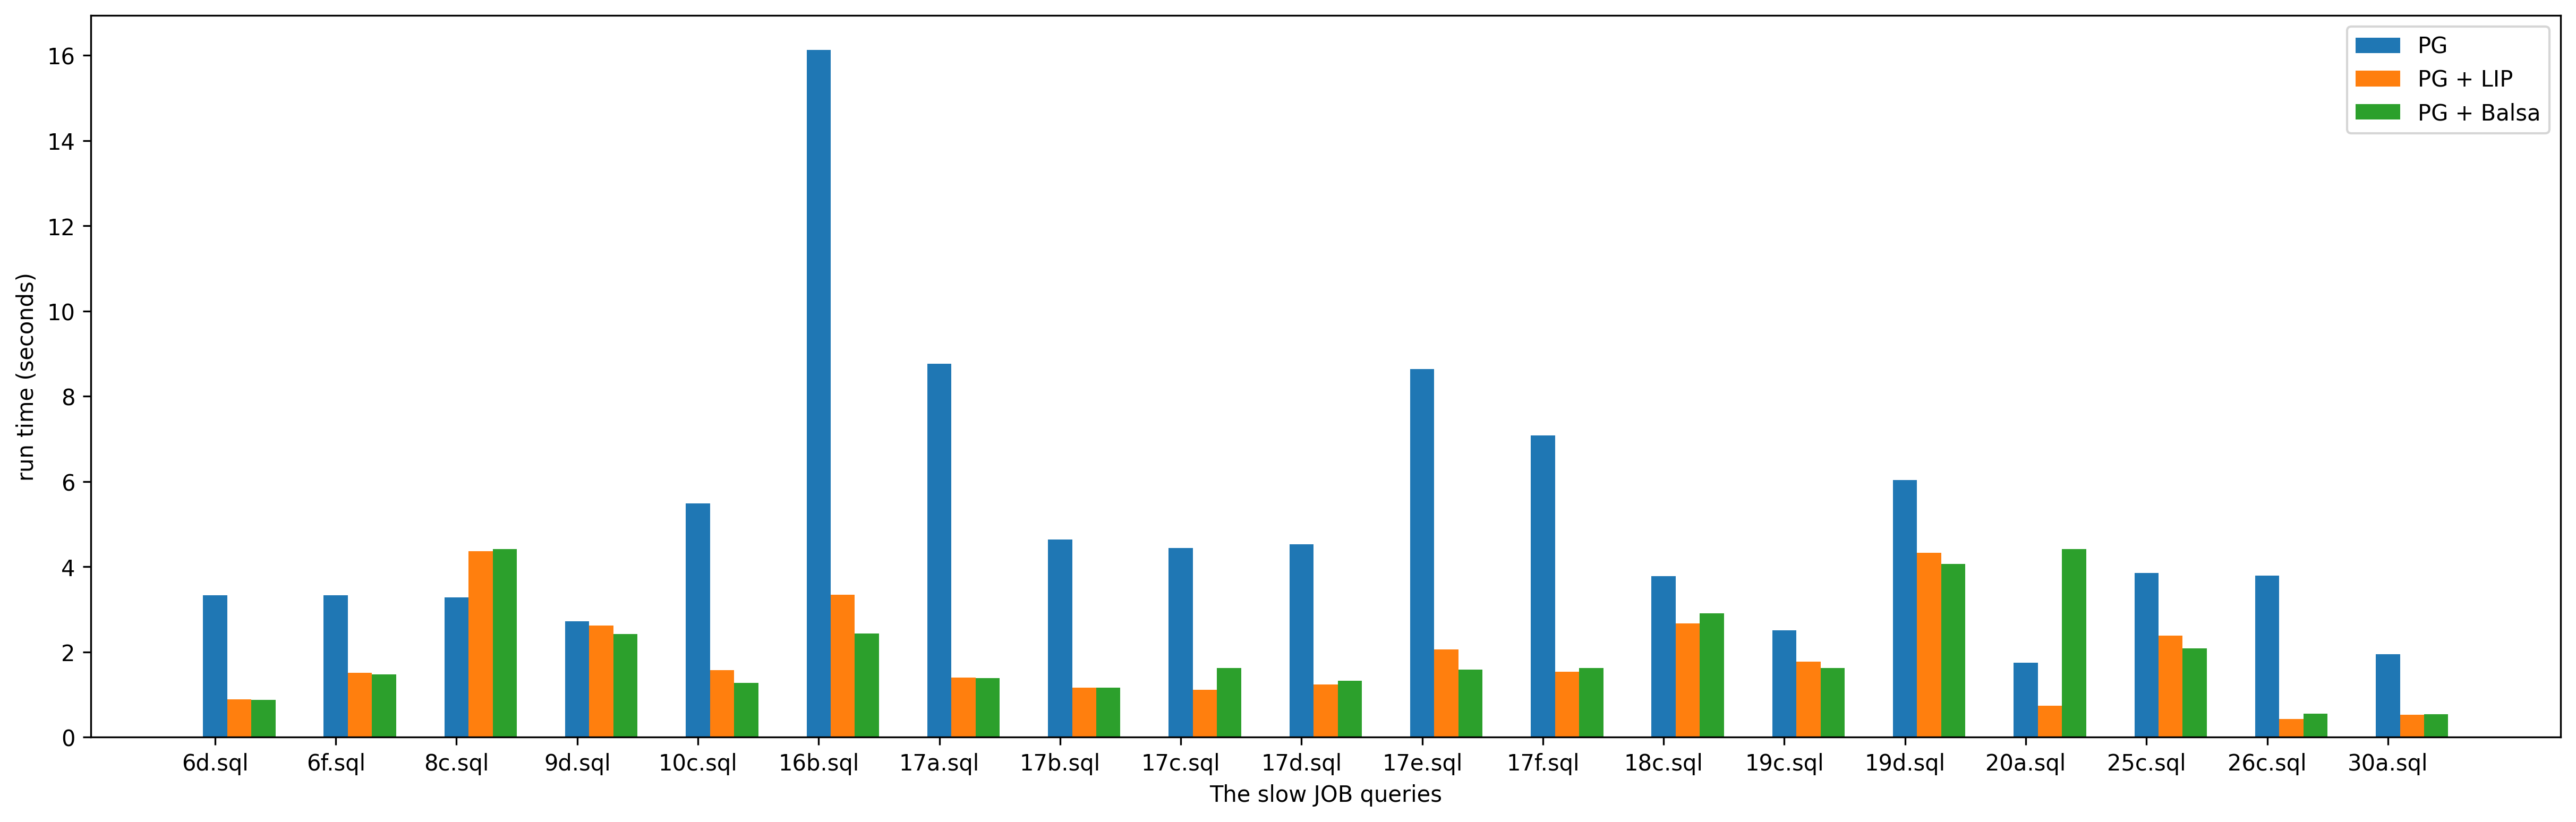

In [15]:
import json
import numpy as np

lip_filename = 'postgres_pg_lip_balsa_parallel=1_imdbload_runtimes.json'
no_lip_filename = 'postgres_parallel=1_imdbload_runtimes.json'
balsa_filename = 'postgres_parallel=1_imdbload_balsa_runtimes.json'


job_slow_queries = [
    '6d.sql', '6f.sql', '8c.sql', '9d.sql', 
    '10c.sql', '16b.sql', '17a.sql', '17b.sql',  '17c.sql', '17d.sql',  '17e.sql', '17f.sql',  
    '18c.sql', '19c.sql', '19d.sql', 
    '20a.sql', '25c.sql', '26c.sql', 
    '30a.sql'
]

lip_runtimes = json.load(open(lip_filename))
non_lip_runtimes = json.load(open(no_lip_filename))
balsa_runtimes = json.load(open(balsa_filename))

total_balsa = 0
total_lip_query = 0
total_non_lip = 0

fixed_runtimes_lip_total = {}
fixed_runtimes_lip_query = {}
fixed_runtimes_non_lip = {}
fixed_runtimes_balsa = {}

for q in job_slow_queries:
    
    lip_runtime = np.array(lip_runtimes[q])
    
    nonlip_runtime = non_lip_runtimes[q]
    balsa_runtime = balsa_runtimes[q]
    
    lip_total_runtime = np.average(lip_runtime[1:, 0])
    lip_query_runtime = np.average(lip_runtime[1:, -1])
    
    nonlip_runtime = np.average(nonlip_runtime[1:])
    balsa_runtime = np.average(balsa_runtime)
    
    print(f"Runtimes: {nonlip_runtime} vs {lip_query_runtime} vs {balsa_runtime}")
    
    fixed_runtimes_balsa[q] = balsa_runtime
    fixed_runtimes_lip_total[q] = lip_total_runtime
    fixed_runtimes_lip_query[q] = lip_query_runtime
    fixed_runtimes_non_lip[q] = nonlip_runtime
    
    total_balsa += balsa_runtime
    total_lip_query += lip_query_runtime
    total_non_lip += nonlip_runtime
    
    # if np.abs(nonlip_runtime - lip_runtime) >= 2:
    #     fixed_runtimes_lip[q.split('.')[0]] = lip_runtime
    #     fixed_runtimes_non_lip[q.split('.')[0]] = nonlip_runtime

# fixed_runtimes_non_lip = {k: v for k, v in sorted(fixed_runtimes_non_lip.items(), key=lambda item: item[1])}
# fixed_runtimes_lip = {k: fixed_runtimes_lip[k] for k in fixed_runtimes_non_lip.keys()}

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 6), dpi=300)
# ax.bar(fixed_runtimes_non_lip.keys(), fixed_runtimes_non_lip.values(), label='w/o LIP slowdown', alpha=0.5)
# ax.bar(fixed_runtimes_non_lip.keys(), fixed_runtimes_lip.values(), label='w/ LIP slowdown', alpha=0.5)
width = 0.2

plt.bar([i for i in range(len(job_slow_queries))], fixed_runtimes_non_lip.values(), label='PG', alpha=1, width=width)
# plt.bar([i+width for i in range(len(job_slow_queries))], fixed_runtimes_lip_query.values(), label='PG + LIP', alpha=1, width=width)
plt.bar([i+width for i in range(len(job_slow_queries))], fixed_runtimes_lip_query.values(), label='PG + LIP', alpha=1, width=width)
plt.bar([i+2*width for i in range(len(job_slow_queries))], fixed_runtimes_balsa.values(), label='PG + Balsa', alpha=1, width=width)

plt.xticks([i for i in range(len(job_slow_queries))], job_slow_queries)
plt.legend()
plt.xlabel("The slow JOB queries")
plt.ylabel("run time (seconds)")

print(f"Total improvement: Balsa: {(total_balsa)/total_non_lip:.2f}, PG_LIP: {total_lip_query/total_non_lip:.2f}")

# plt.savefig("lip_total_vs_balsa_job_slow.pdf", dpi=300)
# ======================= 


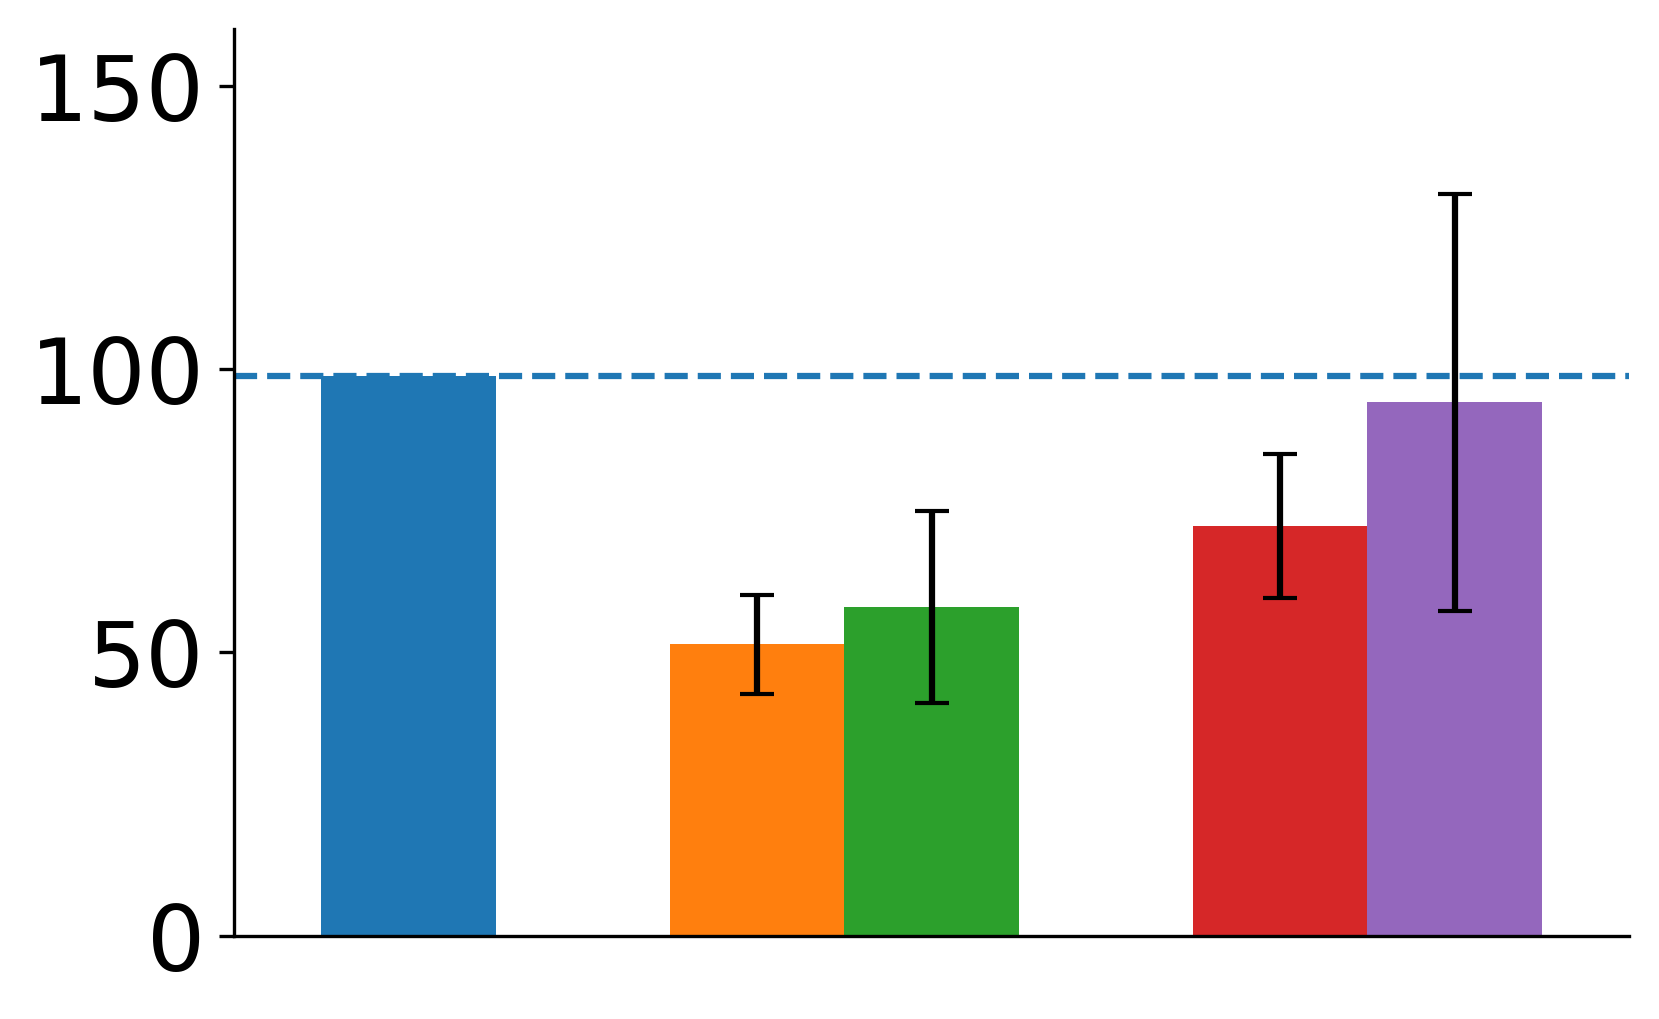

In [89]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.bar([i+0*width for i in range(len(group_runtimes)+2)], [pg_rand_test_runtime, pg_slow_test_runtime] + [i for i,j in zip(PG_runtimes, PG_runtimes)], label='PG', alpha=1, width=width, )
# # plt.bar([i+1*width for i in range(len(group_runtimes)+2)], all_pg_no_nl, label='PG-no-NL', alpha=1, width=width, )
# # plt.bar([i+2*width for i in range(len(group_runtimes)+2)], all_pg_no_mj, label='PG-no-MJ', alpha=1, width=width, )
# # plt.bar([i+3*width for i in range(len(group_runtimes)+2)], all_pg_no_nl_mj, label='PG-no-NL-MJ', alpha=1, width=width, )
# plt.bar([i+1*width for i in range(len(group_runtimes)+2)], all_train,  label='Balsa-train', yerr= all_train_std, alpha=1,capsize=2, width=width, )
# plt.bar([i+2*width for i in range(len(group_runtimes)+2)], all_train_jo, label='Balsa-train-JO', yerr= all_train_jo_std, alpha=1, capsize=2, width=width, )
# plt.bar([i+3*width for i in range(len(group_runtimes)+2)], [balsa_test_rand_test_runtimes-5, balsa_test_slow_test_runtimes] + [0 for _ in range(6)], label='Balsa-test', yerr=[balsa_test_rand_test_runtimes_std,balsa_test_slow_test_runtimes_std ]+ [0 for _ in range(6)], capsize=2, alpha=1, width=width, )
# plt.bar([i+4*width for i in range(len(group_runtimes)+2)], [balsa_test_jo_rand_test[0]-5, balsa_test_jo_slow_test[0]] + [0 for _ in range(6)], label='Balsa-test-JO', yerr=[balsa_test_jo_rand_test[1], balsa_test_jo_slow_test[1]]+ [0 for _ in range(6)], capsize=2, alpha=1, width=width, )
# plt.bar([i+5*width if i<2 else i+3*width for i in range(len(group_runtimes)+2)], all_pg_tune_op, label='PG-tune-op', alpha=1, width=width, )

width = 0.1
gap = width
# plt.bar([i+0*width for i in range(2)], [98.8, 57.7], label='PG', alpha=1, width=width, )
# # plt.bar([i+0*width for i in range(2)], [98.8, 65.96], label='Balsa-test', alpha=1, width=width, )
# plt.bar([i+1*width for i in range(2)], [51.42, 29.44], yerr=[8.7, 6.2], capsize=2, label='Balsa-train', alpha=1, width=width, )
# plt.bar([i+2*width for i in range(2)], [58, 31.19], yerr=[17, 10], capsize=2, label='Balsa-train-JO', alpha=1, width=width, )
# plt.bar([i+3*width for i in range(2)], [72.32, 41], label='Balsa-test', yerr= [12.72, 9], capsize=2, alpha=1, width=width, )
# plt.bar([i+4*width for i in range(2)], [69+7, 35], alpha=1, label='pg_lip overhead', width=width,color='none', edgecolor='mediumpurple', hatch='////')
# plt.bar([i+4*width for i in range(2)], [69-3.6, 28-3], label='pg_lip query time', alpha=1, width=width,  color='mediumpurple')
# plt.bar([i+5*width for i in range(2)], [44.9 + 5.9 + 0.4, 27.38 + 5.8 + 0.4], alpha=1, label='pg_lip + pg_aj overhead', width=width,color='none', edgecolor='plum', hatch='////')
# plt.bar([i+5*width for i in range(2)], [44.9-3.6, 27.38-3], label='pg_lip + pg_aj query time', alpha=1, width=width,  color='plum')

plt.axhline(y=98.8,  linestyle='dashed', c='tab:blue')
# plt.bar([i+0*width for i in range(1)], [98.8], label='PostgreSQL', yerr=[1.1], capsize=2, alpha=1, width=width, )
plt.bar([i+0*width for i in range(1)], [98.8], label='PostgreSQL', capsize=4, alpha=1, width=width, )

plt.bar([i+1*width + 1*gap for i in range(1)], [51.42], yerr=[8.7], capsize=4, label='Balsa-overfit', alpha=1, width=width, )
plt.bar([i+2*width + 1*gap for i in range(1)], [58], yerr=[17], capsize=4, label='Balsa-overfit-JO', alpha=1, width=width, )

plt.bar([i+3*width + 2*gap for i in range(1)], [72.32], label='Balsa', yerr= [12.72], capsize=4, alpha=1, width=width, )
plt.bar([i+4*width + 2*gap for i in range(1)], [94.17], label='Balsa-JO', yerr= [36.79], capsize=4, alpha=1, width=width, )

# plt.ylabel("Run time (sec)")
# plt.xlabel("Perfor")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylim([0, 160])
plt.xlim([-0.1, 0.7])
# plt.xticks([i + 2.5*width for i in range(2)], ['JOB Rand Group', 'JOB Slow Group', 'TPC-H Complex Group'])
# plt.legend(loc='upper right', prop={'size': 8}, ncol=2)

# plt.legend(loc='upper left', prop={'size': 15}, ncol=2)
# plt.title('Performance on JOB-Slow')
plt.yticks(fontsize=22)


# plt.title('Performance on JOB-Slow')
plt.savefig('./how-generalizable-jobslow.pdf')
plt.show()


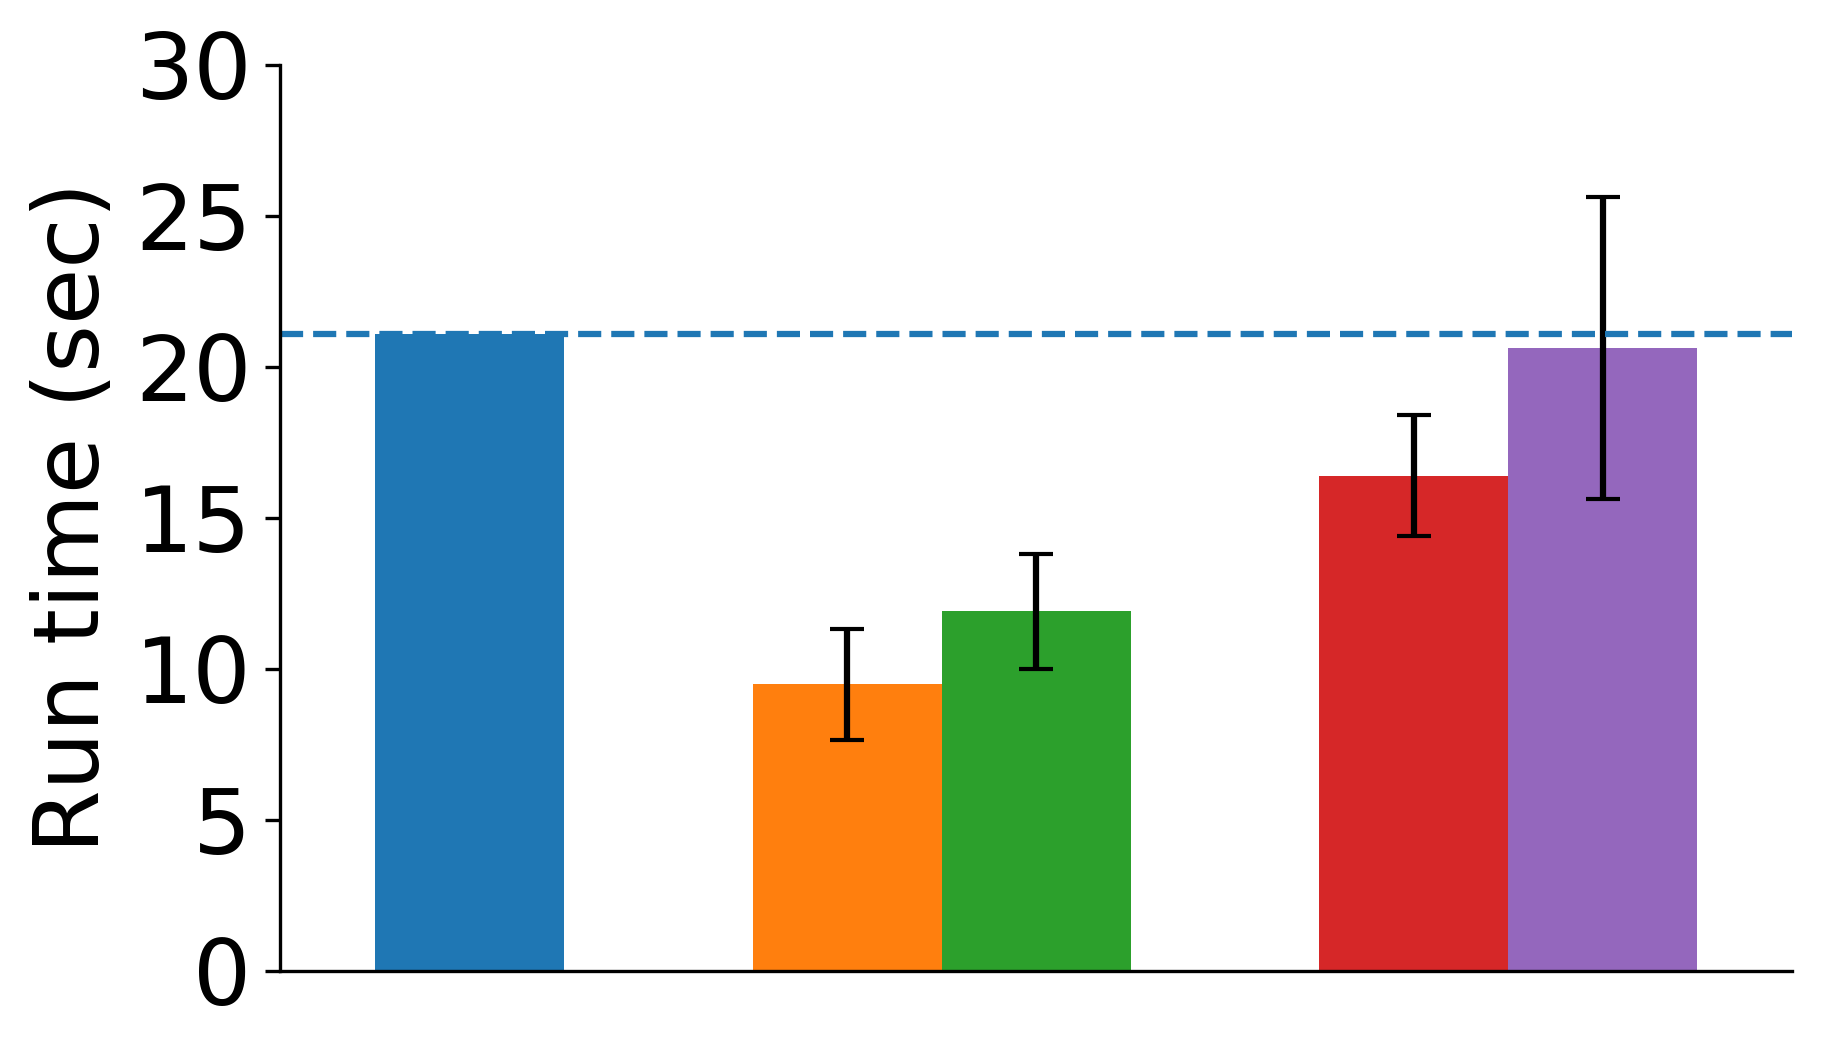

Saving to: ./how-generalizable-legend.pdf


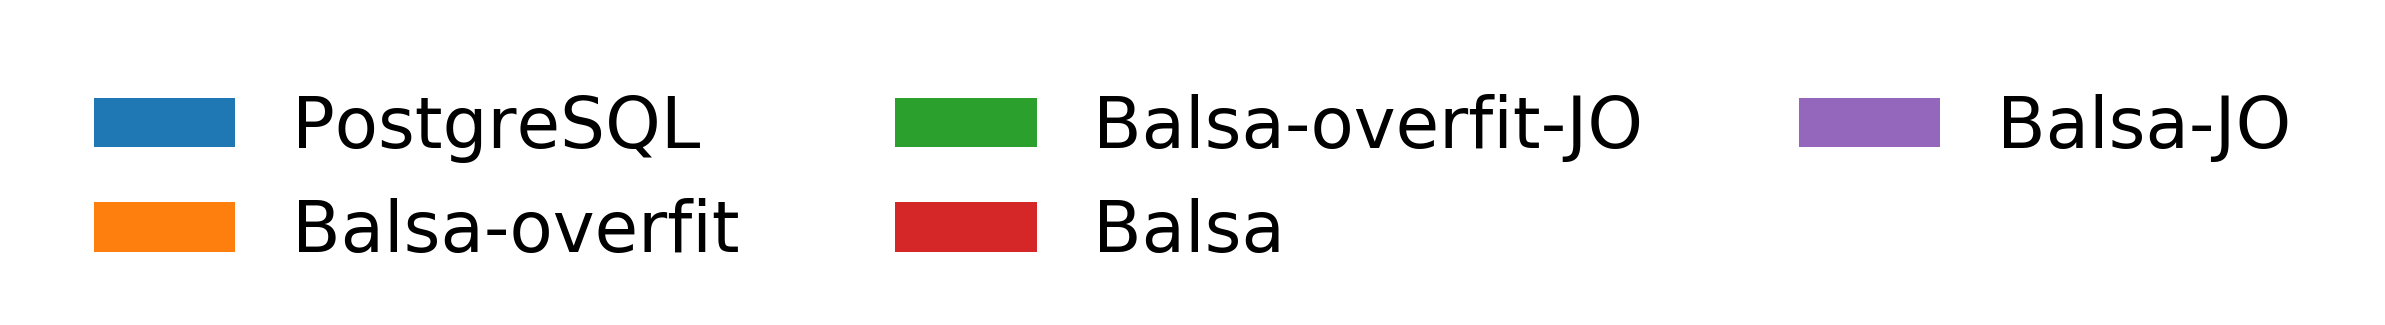

In [118]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6.5, 4), dpi=300)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.rcParams['font.size'] = '16'

# plt.bar([i+0*width for i in range(len(group_runtimes)+2)], [pg_rand_test_runtime, pg_slow_test_runtime] + [i for i,j in zip(PG_runtimes, PG_runtimes)], label='PG', alpha=1, width=width, )
# # plt.bar([i+1*width for i in range(len(group_runtimes)+2)], all_pg_no_nl, label='PG-no-NL', alpha=1, width=width, )
# # plt.bar([i+2*width for i in range(len(group_runtimes)+2)], all_pg_no_mj, label='PG-no-MJ', alpha=1, width=width, )
# # plt.bar([i+3*width for i in range(len(group_runtimes)+2)], all_pg_no_nl_mj, label='PG-no-NL-MJ', alpha=1, width=width, )
# plt.bar([i+1*width for i in range(len(group_runtimes)+2)], all_train,  label='Balsa-train', yerr= all_train_std, alpha=1,capsize=2, width=width, )
# plt.bar([i+2*width for i in range(len(group_runtimes)+2)], all_train_jo, label='Balsa-train-JO', yerr= all_train_jo_std, alpha=1, capsize=2, width=width, )
# plt.bar([i+3*width for i in range(len(group_runtimes)+2)], [balsa_test_rand_test_runtimes-5, balsa_test_slow_test_runtimes] + [0 for _ in range(6)], label='Balsa-test', yerr=[balsa_test_rand_test_runtimes_std,balsa_test_slow_test_runtimes_std ]+ [0 for _ in range(6)], capsize=2, alpha=1, width=width, )
# plt.bar([i+4*width for i in range(len(group_runtimes)+2)], [balsa_test_jo_rand_test[0]-5, balsa_test_jo_slow_test[0]] + [0 for _ in range(6)], label='Balsa-test-JO', yerr=[balsa_test_jo_rand_test[1], balsa_test_jo_slow_test[1]]+ [0 for _ in range(6)], capsize=2, alpha=1, width=width, )
# plt.bar([i+5*width if i<2 else i+3*width for i in range(len(group_runtimes)+2)], all_pg_tune_op, label='PG-tune-op', alpha=1, width=width, )

width = 0.1
gap = width
# plt.bar([i+0*width for i in range(2)], [98.8, 57.7], label='PG', alpha=1, width=width, )
# # plt.bar([i+0*width for i in range(2)], [98.8, 65.96], label='Balsa-test', alpha=1, width=width, )
# plt.bar([i+1*width for i in range(2)], [51.42, 29.44], yerr=[8.7, 6.2], capsize=2, label='Balsa-train', alpha=1, width=width, )
# plt.bar([i+2*width for i in range(2)], [58, 31.19], yerr=[17, 10], capsize=2, label='Balsa-train-JO', alpha=1, width=width, )
# plt.bar([i+3*width for i in range(2)], [72.32, 41], label='Balsa-test', yerr= [12.72, 9], capsize=2, alpha=1, width=width, )
# plt.bar([i+4*width for i in range(2)], [69+7, 35], alpha=1, label='pg_lip overhead', width=width,color='none', edgecolor='mediumpurple', hatch='////')
# plt.bar([i+4*width for i in range(2)], [69-3.6, 28-3], label='pg_lip query time', alpha=1, width=width,  color='mediumpurple')
# plt.bar([i+5*width for i in range(2)], [44.9 + 5.9 + 0.4, 27.38 + 5.8 + 0.4], alpha=1, label='pg_lip + pg_aj overhead', width=width,color='none', edgecolor='plum', hatch='////')
# plt.bar([i+5*width for i in range(2)], [44.9-3.6, 27.38-3], label='pg_lip + pg_aj query time', alpha=1, width=width,  color='plum')

plt.axhline(y=21.09,  linestyle='dashed', c='tab:blue')
plt.bar([i+0*width for i in range(1)], [21.09], capsize=4, label='PostgreSQL', alpha=1, width=width, linewidth=4, )

plt.bar([i+1*width + 1 * gap for i in range(1)], [9.48], yerr=[1.84], capsize=4, label='Balsa-overfit', alpha=1, width=width, )
plt.bar([i+2*width + 1 * gap for i in range(1)], [11.9], yerr=[1.9], capsize=4, label='Balsa-overfit-JO', alpha=1, width=width, )
plt.bar([i+3*width + 2 * gap for i in range(1)], [16.38], label='Balsa', yerr= [2], capsize=4, alpha=1, width=width, )
plt.bar([i+4*width + 2 * gap for i in range(1)], [20.62], label='Balsa-JO', yerr= [5], capsize=4, alpha=1, width=width, )

plt.ylabel("Run time (sec)", fontsize=22)
# plt.xlabel("Perfor")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylim([0, 30])
plt.xlim([-0.1, 0.7])
# plt.xticks([i + 2.5*width for i in range(2)], ['JOB Rand Group', 'JOB Slow Group', 'TPC-H Complex Group'])
# plt.legend(loc='upper left', prop={'size': 16.5}, ncol=2)
# plt.title('Performance on JOB-Slow')
plt.yticks(fontsize=22)
plt.savefig('./how-generalizable-jobrand.pdf')
plt.show()


fig.canvas.draw()
# This gives pixel coordinates for the legend bbox (although perhaps 
# if you are using a different renderer you might get something else).
# legend_bbox = legend.get_tightbbox(fig.canvas.get_renderer())
# # Convert pixel coordinates to inches
# legend_bbox = legend_bbox.transformed(fig.dpi_scale_trans.inverted())
legend_fig, legend_ax = plt.subplots(figsize=(10, 0.3), dpi=300)
legend_squared = legend_ax.legend(
    *ax.get_legend_handles_labels(), 
#     bbox_to_anchor=(0, 0, 1, 1),
    bbox_transform=legend_fig.transFigure,
    frameon=False,
#     fancybox=None,
#     shadow=False,
    ncol=3,
    mode='expand',
    prop={'size': 17}
)

# Remove everything else from the legend's figure
legend_ax.axis('off')

# Save the legend as a separate figure
legend_figpath = './how-generalizable-legend.pdf'
print(f"Saving to: {legend_figpath}")
legend_fig.savefig(
    legend_figpath,
    bbox_inches='tight',
    bbox_extra_artists=[legend_squared],
    pad_inches = 0
)

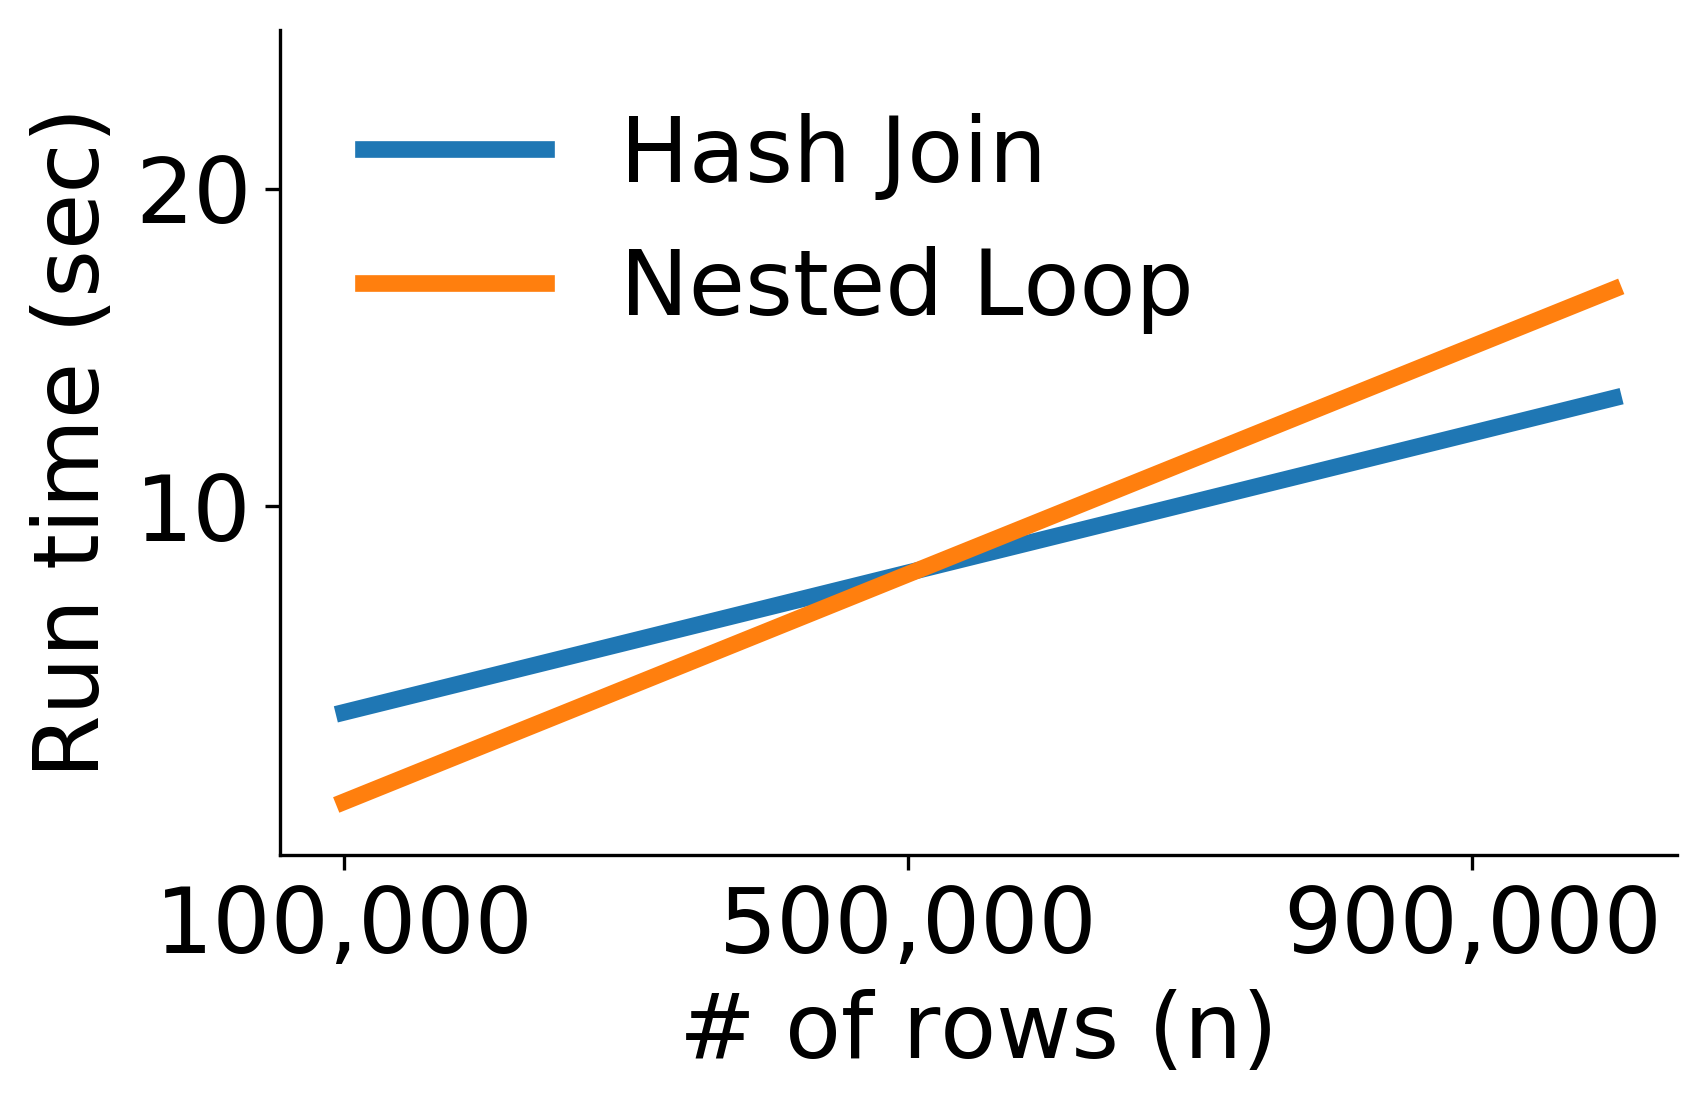

In [130]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.rcParams['font.size'] = '17'

plt.ylim([-1, 25])

plt.plot([100000, 500000 * 2], [ 3.5, 13.4], label='Hash Join', linewidth=4)
plt.plot([100000, 500000 * 2], [ 0.68,  8.412 * 2], label='Nested Loop', linewidth=4)
plt.xlabel("# of rows (n)", fontsize=22)
plt.ylabel("Run time (sec)", fontsize=22)
plt.yticks([10, 20], fontsize=22)
plt.xticks([100000, 500000, 900000], ['100,000', '500,000', '900,000'], fontsize=22)
plt.legend(loc='upper left', prop={'size': 22}, ncol=1, frameon=False)
plt.tight_layout()
plt.savefig('./threshold_idx.pdf')

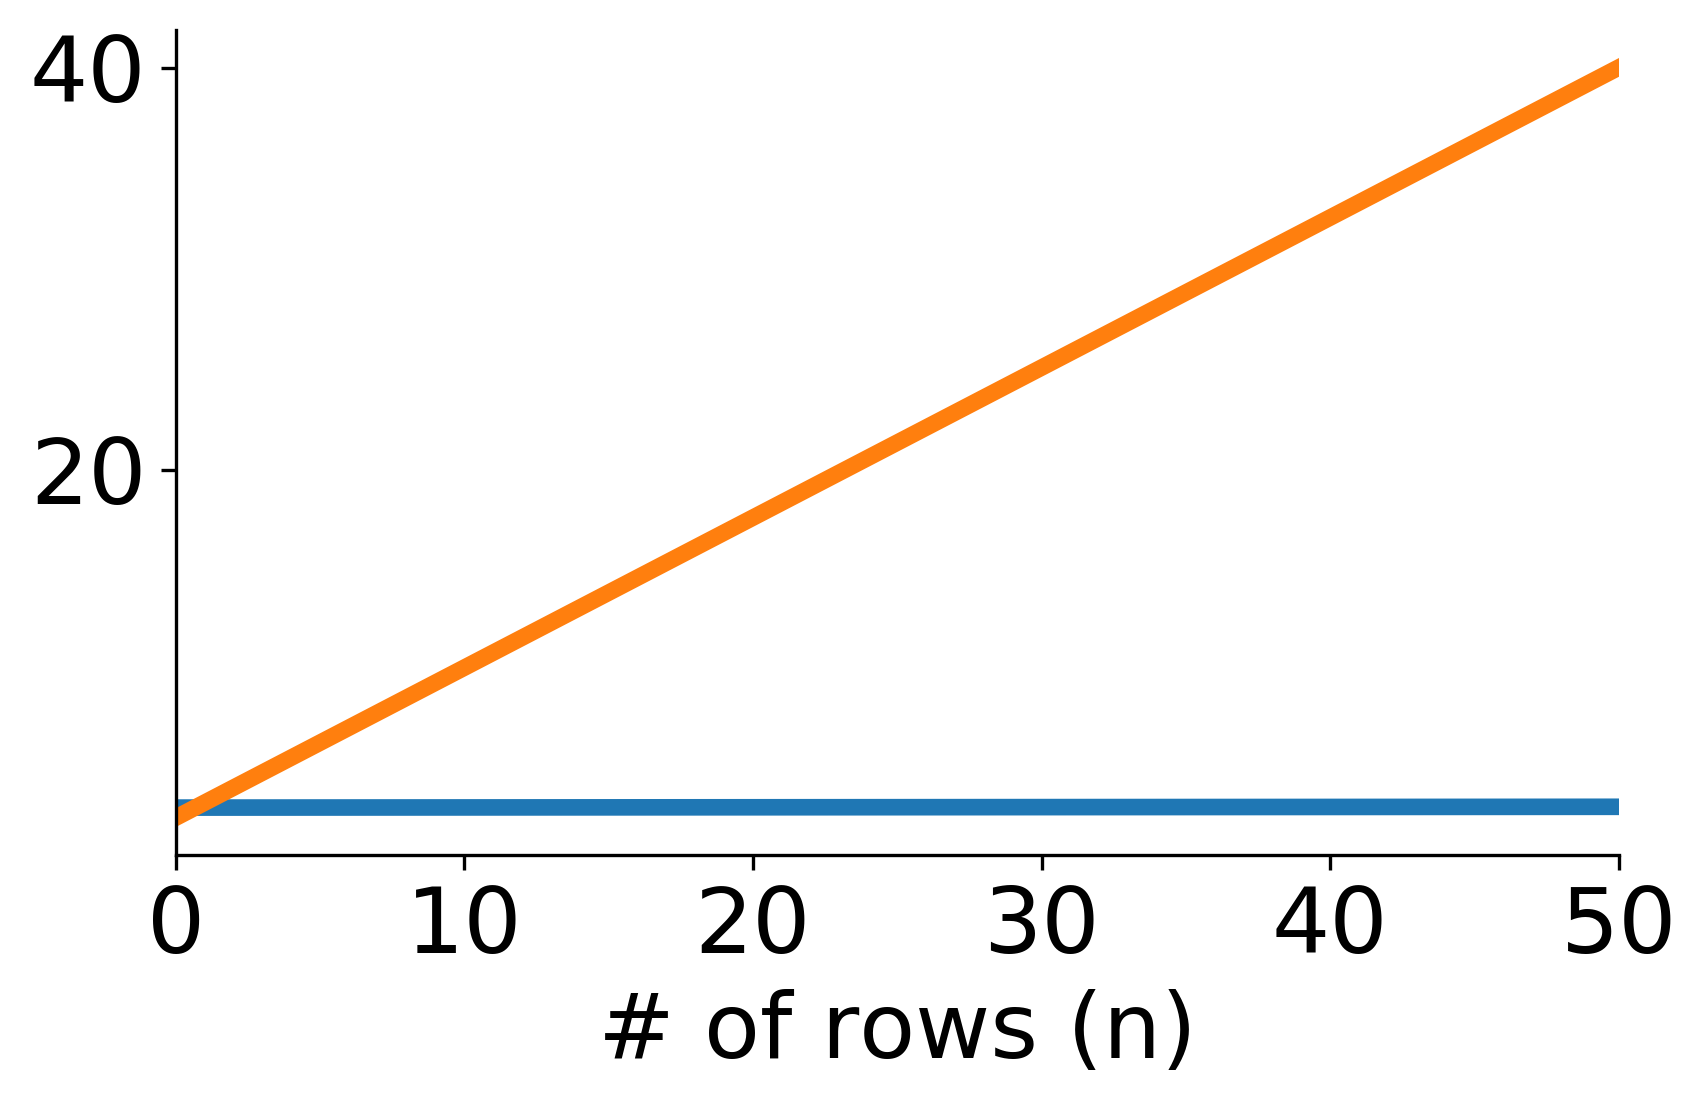

In [131]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.rcParams['font.size'] = '17'

plt.plot([0, 50], [ 3.20, 3.24], label='Hash Join', linewidth=4)
plt.plot([0, 50], [ 2.7,  40], label='Nested Loop', linewidth=4)
plt.xlabel("# of rows (n)", fontsize=22)
# plt.ylabel("Run time (sec)", fontsize=17)
plt.xlim([0, 50])
plt.yticks([20, 40], fontsize=22)

plt.xticks( fontsize=22)
plt.tight_layout()
# plt.legend(loc='upper left', prop={'size': 17}, ncol=1)
plt.savefig('./threshold_non_idx.pdf')

# Test perfromance by group (# of joins)

In [47]:
import json
g = 2
t = 1
group_runtime_takes_filename = f'postgres_balsa_test_join_group{g}_take{t}_parallel=1_imdbload_runtimes.json'
total_time = 0
group_runtimes_dict = json.load(open(group_runtime_takes_filename))
for q in group_runtimes_dict:
    total_time += min(group_runtimes_dict[q])
total_time

133.5960831642151

[20.763, 82.8, 51.2, 102.1, 69.0, 15.2]
[5.790889666666667, 23.29458766666667, 14.727880666666666, 21.011163, 11.297906333333334, 2.5465243333333336]
[9.5354066, 55.13130859999999, 28.423735000000004, 23.65518, 14.316183400000002, 7.6639067999999995]


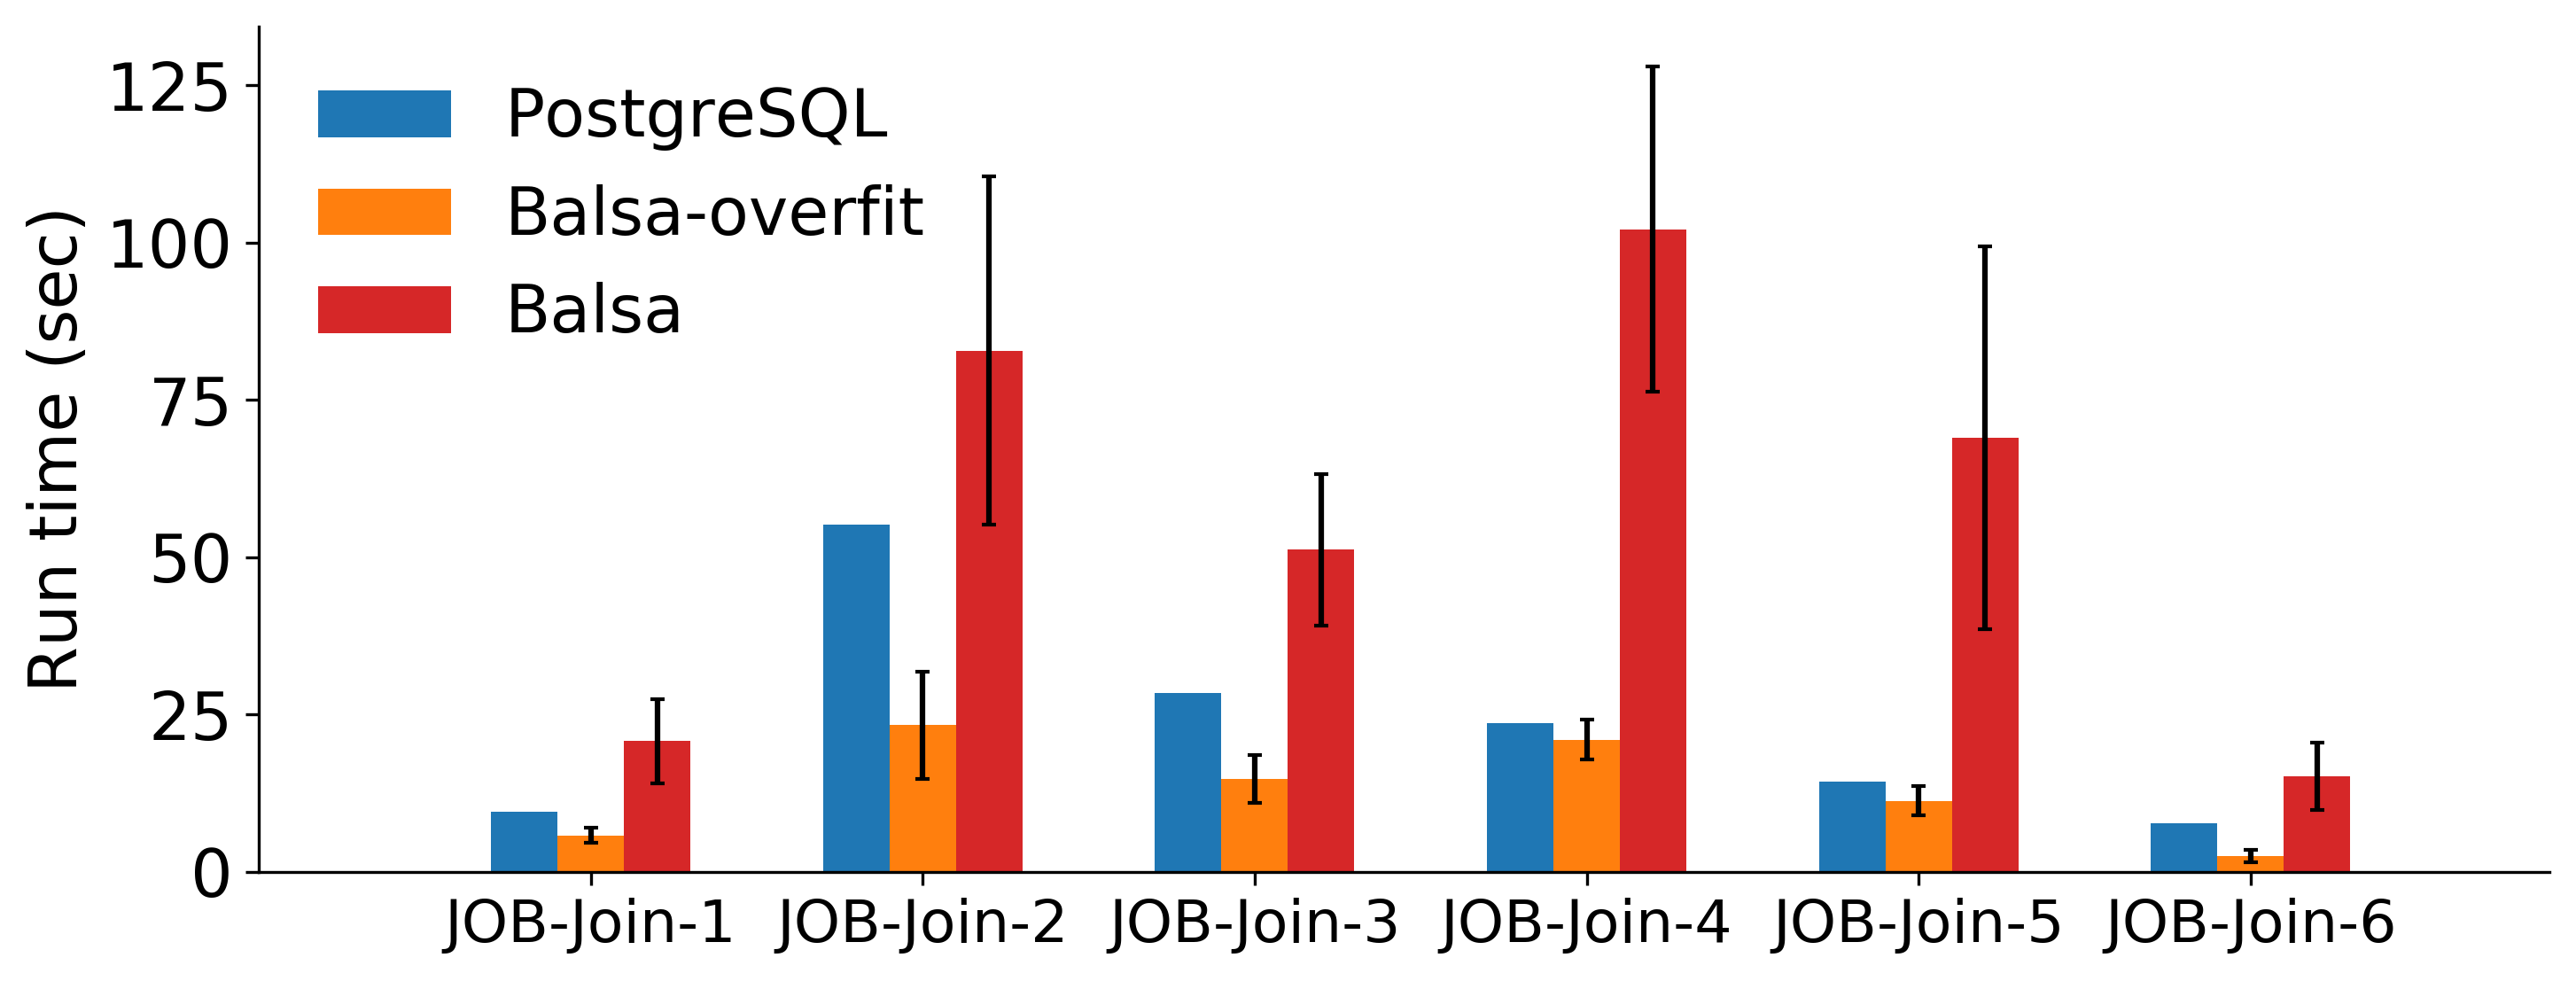

In [132]:
JOB_groups = {
    '1': ['3a.sql', '3b.sql', '3c.sql', '1a.sql', '1b.sql', '1c.sql', '1d.sql', '2a.sql', '2b.sql', '2c.sql', '2d.sql', '4a.sql', '4b.sql', '4c.sql',
            '5a.sql', '5b.sql', '5c.sql', '6a.sql', '6b.sql', '6c.sql', '6d.sql', '6e.sql', '6f.sql',  # 20
        ],
    '2': [
            '32a.sql', '32b.sql',
            '8a.sql', '8b.sql', '8c.sql', '8d.sql', '10a.sql', '10b.sql', '10c.sql', '17a.sql', '17b.sql', '17c.sql', '17d.sql', '17e.sql', '17f.sql',
            '18a.sql', '18b.sql', '18c.sql',   # 16
        ],
    '3': [
            '7a.sql', '7b.sql', '7c.sql', '9a.sql', '9b.sql', '9c.sql', '9d.sql', '11a.sql', '11b.sql', '11c.sql', '11d.sql',
            '12a.sql', '12b.sql', '12c.sql', '14a.sql', '14b.sql', '14c.sql', '16a.sql', '16b.sql', '16c.sql', '16d.sql' # 21
        ],
    '4': [
            '13a.sql', '13b.sql', '13c.sql', '13d.sql', '15a.sql', '15b.sql', '15c.sql', '15d.sql', '21a.sql', '21b.sql', '21c.sql',
            '25a.sql', '25b.sql', '25c.sql',
            '19a.sql', '19b.sql', '19c.sql', '19d.sql', '20a.sql', '20b.sql', '20c.sql',  # 7
        ],
    '5': [
            '22a.sql', '22b.sql', '22c.sql', '22d.sql', '23a.sql', '23b.sql', '23c.sql', '31a.sql', '31b.sql', '31c.sql',
            '24a.sql', '24b.sql', '26a.sql', '26b.sql', '26c.sql', '27a.sql', '27b.sql', '27c.sql', '30a.sql', '30b.sql', '30c.sql' # 11
        ],
    '6': [
        '28a.sql', '28b.sql', '28c.sql', '33a.sql', '33b.sql', '33c.sql',
        '29a.sql', '29b.sql', '29c.sql']
}

import json
import numpy as np
group_runtime_filename = 'postgres_parallel=1_imdb_balsa_join_group_test.json'
# balsa_filename = 'postgres_parallel=1_imdbload_balsa_runtimes.json'
balsa_filename = 'best_balsa_train_all_try_runtimes.json'
no_lip_filename = 'postgres_parallel=1_imdbload_runtimes.json'
# no_lip_filename = 'best_pg_baseline_job_runtimes.json'


group_runtimes_dict = json.load(open(group_runtime_filename))
balsa_train_runtimes_dict = json.load(open(balsa_filename))
PG_runtimes_dict = json.load(open(no_lip_filename))

group_runtimes = []
balsa_train_runtimes = []
PG_runtimes = []

balsa_std_err = []
group_test_std_err = []

for g in JOB_groups:
    group_runtimes.append(np.median(group_runtimes_dict[g]['best']))
    group_test_std_err.append(np.std(group_runtimes_dict[g]['best']))
    
    total_train_runtimes = 0
    total_PG_runtimes = 0
    
    
    for q in JOB_groups[g]:
        total_PG_runtimes += np.average(PG_runtimes_dict[q])
    
    total_train_runtimes_try = [0,0,0]
    for q in JOB_groups[g]:
        # print(q)
        total_train_runtimes += np.average(balsa_train_runtimes_dict[q])
        # print(balsa_train_runtimes_dict[q])
        
        for n_try in range(0, 3):
            total_train_runtimes_try[n_try] += balsa_train_runtimes_dict[q][n_try]
    
    balsa_std_err.append(np.std(total_train_runtimes_try))
    
    balsa_train_runtimes.append(total_train_runtimes)
    PG_runtimes.append(total_PG_runtimes)
        
print(group_runtimes)
print(balsa_train_runtimes)
print(PG_runtimes)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.bar(fixed_runtimes_non_lip.keys(), fixed_runtimes_non_lip.values(), label='w/o LIP slowdown', alpha=0.5)
# ax.bar(fixed_runtimes_non_lip.keys(), fixed_runtimes_lip.values(), label='w/ LIP slowdown', alpha=0.5)
width = 0.2

plt.bar([i-1*width for i in range(len(group_runtimes))], [i for i,j in zip(PG_runtimes, PG_runtimes)], label='PostgreSQL', alpha=1, width=width)
plt.bar([i-0*width for i in range(len(group_runtimes))], [j for i,j in zip(PG_runtimes, balsa_train_runtimes)], yerr=[1.2,
 8.478557571046939,
 3.7679110263185164,
 3.148416593523739,
 2.2908052193201824,
 0.971250125586035], capsize=2, label='Balsa-overfit', alpha=1, width=width)
plt.bar([i+1*width for i in range(len(group_runtimes))], [j for i,j in zip(PG_runtimes, group_runtimes)],  yerr=[j for i,j in zip(PG_runtimes, group_test_std_err)], capsize=2, color='tab:red', label='Balsa', alpha=1, width=width)
# plt.bar([i+width for i in range(len(job_slow_queries))], fixed_runtimes_lip_query.values(), label='PG + LIP', alpha=1, width=width)

# plt.axhline(y=1,  linestyle='dashed', c='gray')

plt.xlim([-1, 5.9])

plt.ylabel("Run time (sec)", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks([i for i in range(len(group_runtimes))], [f'JOB-Join-{i+1}' for i in range(len(group_runtimes))], fontsize=16)
plt.legend(loc='upper left', prop={'size': 18}, ncol=1, frameon=False)

plt.tight_layout()

plt.savefig('./how-generaliable-join-groups.pdf')



In [133]:
[group_runtimes[i] / PG_runtimes[i]  for i in range(6)]

[2.177463517916478,
 1.5018689398567988,
 1.8013114743716825,
 4.316179373820026,
 4.819720317357767,
 1.98332265731624]

# Viz cost model

In [253]:
import json
import numpy as np
import matplotlib.pyplot as plt

# q = '10a'
# q = '10c'
q = '17a'

selected_plan = {
    '10c': {
        'predict': 3.103,
        'true': 2.05
    }
}

rand_q_runtime_dict = json.load(open(f'eval_cost_model/postgres_balsa_eval_cost_model_{q}_runtimes.json'))

true_latency = []
pred_latency = []

cnt = 0
for query in rand_q_runtime_dict:
    true_latency.append(np.min(rand_q_runtime_dict[query]))
    
    with open(f'/mnt/pg_lip_bloom/queries/job_balsa_eval_cost_model/{q}/{query}') as f:
        sql = f.read()
    pred = float(sql.split('------ prediction: ')[-1].split('ms')[0]) / 1000
    pred_latency.append(pred)
    cnt += 1
    
print(f"Total queries: {cnt}")
# true_latency = np.array(true_latency)

# fig, ax = plt.subplots(figsize=(5, 4), dpi=300)
# plt.scatter(pred_latency, true_latency, marker='x', label='Random plan')
# # plt.scatter([selected_plan[q]['predict']], [selected_plan[q]['true']], marker='x', label='Plan selected by Balsa')

# # plt.xlim([0,20])
# # plt.ylim([0,20])

# plt.xlabel("predicted latency (sec)")
# plt.ylabel("true latency (sec)")
# plt.legend()


Total queries: 111


In [254]:
import json
import numpy as np
import matplotlib.pyplot as plt

selected_plan = {
    '10c': {
        'predict': 3.103,
        'true': 2.05
    }
}

rand_q_runtime_dict = json.load(open(f'eval_cost_model/postgres_balsa_eval_cost_model_{q}_balsa_touched_runtimes.json'))

touched_true_latency = []
touched_pred_latency = []

for query in rand_q_runtime_dict:
    touched_true_latency.append(np.min(rand_q_runtime_dict[query]))
    
    with open(f'/mnt/pg_lip_bloom/queries/job_balsa_eval_cost_model/{q}_balsa_touched/{query}') as f:
        sql = f.read()
    pred = float(sql.split('------ prediction: ')[-1].split('ms')[0]) / 1000
    touched_pred_latency.append(pred)
    
# true_latency = np.array(true_latency)

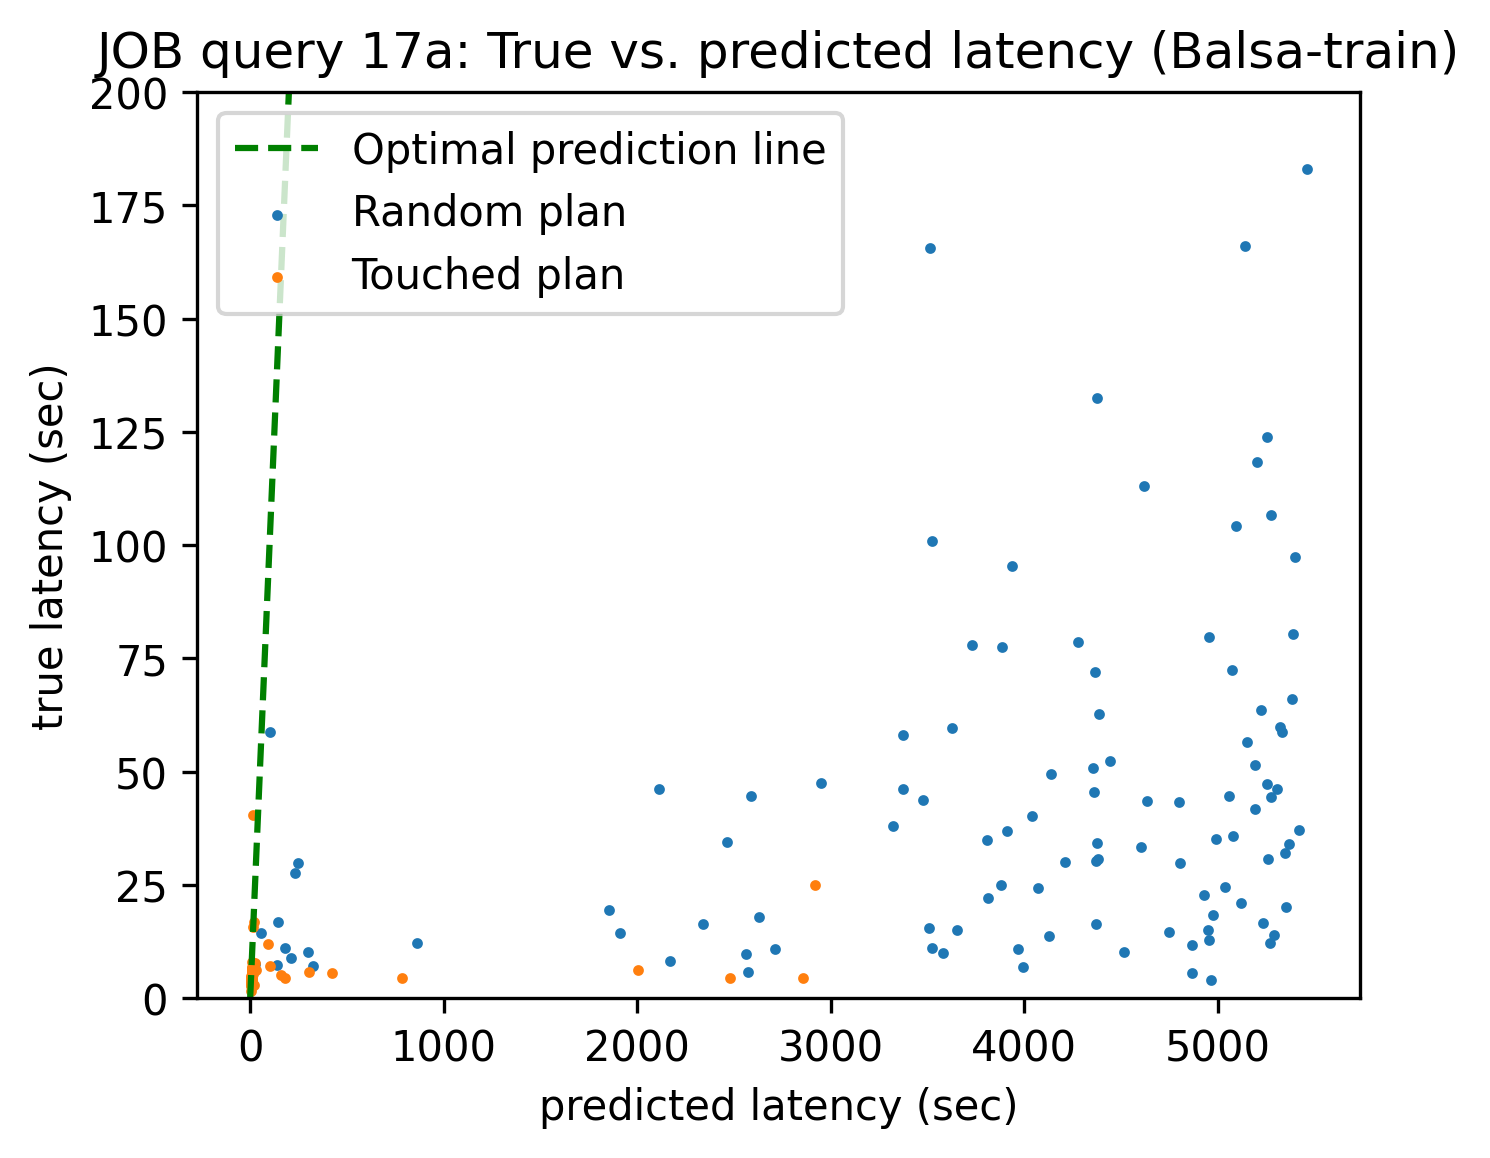

In [255]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=300)
plt.scatter(pred_latency, true_latency, marker='.', label='Random plan', s=10)
plt.scatter(touched_pred_latency, touched_true_latency, marker='.', label='Touched plan', s=10)
# plt.scatter([selected_plan[q]['predict']], [selected_plan[q]['true']], marker='x', label='Plan selected by Balsa')

plt.plot([0, 1000], [0, 1000],  linestyle='dashed', label='Optimal prediction line', color='green')


# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(np.array(pred_latency).reshape(-1, 1), np.array(true_latency).reshape(-1, 1))
# plt.plot([0, 1000], [model.intercept_, 1000*model.coef_ + model.intercept_],  linestyle='dashed', label='Prediction regression line', color='red')

# plt.xlim([-1,200])
plt.ylim([0,200])

plt.xlabel("predicted latency (sec)")
plt.ylabel("true latency (sec)")
plt.title(f"JOB query {q}: True vs. predicted latency (Balsa-train)")
plt.legend()

[[0.00020655]]


Text(0, 0.5, 'Nomalized run time')

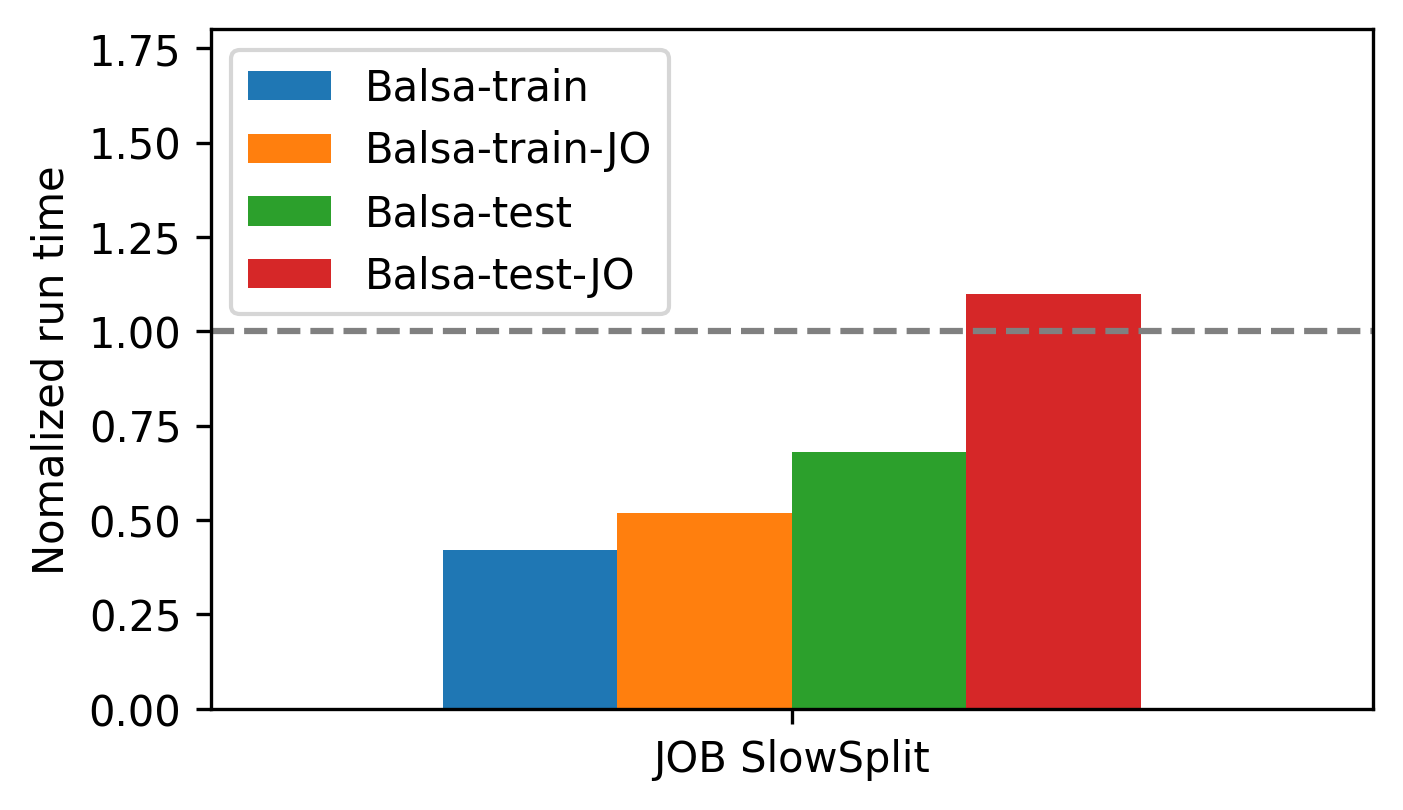

In [252]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 3), dpi=300)
# ax.bar(fixed_runtimes_non_lip.keys(), fixed_runtimes_non_lip.values(), label='w/o LIP slowdown', alpha=0.5)
# ax.bar(fixed_runtimes_non_lip.keys(), fixed_runtimes_lip.values(), label='w/ LIP slowdown', alpha=0.5)
width = 0.3

plt.bar([i-1.5*width for i in range(1)], [0.42], label='Balsa-train', alpha=1, width=width)
plt.bar([i-0.5*width for i in range(1)], [0.52], label='Balsa-train-JO', alpha=1, width=width)
plt.bar([i+0.5*width for i in range(1)], [0.68], label='Balsa-test', alpha=1, width=width)
plt.bar([i+1.5*width for i in range(1)], [1.10], label='Balsa-test-JO', alpha=1, width=width)
plt.axhline(y=1,  linestyle='dashed', c='gray')
plt.xlim([-1, 1])
plt.ylim([0, 1.8])
plt.legend()
plt.xticks([0], ['JOB SlowSplit'])
plt.ylabel("Nomalized run time")
# plt.xlabel("Nomalized run time")